In [1]:
# so modules are automatically reloaded when they are changed
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
from mynotebooks.results_utils import *
import torch

# UKBB Classification Models Results Analysis
- preprocess preditions and metadata
- plot overall statistics
- get quantitative subgroup results
- plot subgroup statistics during training
- analyse fairness generalisation gap results with smaller training data
- analyse test set results
- analyse preliminary mitigation results

## Load/preprocess predictions and metadata

In [4]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
DATA = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/data/ukbb-ret/old_splits_pkls/splits/'
# sex prediction model
results_folder = ROOT + 'your_path/fariness_data/model_records/UKBB_RET_OLD/Sex/cusResNet18/baseline/sex_pred/'
path_to_train_splits = DATA + 'train-sex.csv'
path_to_val_splits = DATA + 'val-sex.csv'

#sex_pred_train_preds, sex_pred_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
path_to_test_splits = DATA + 'test-sex.csv'
sex_pred_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)

In [3]:
# bmi prediction model
results_folder = ROOT + '/your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/bmi_pred/'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-bmi.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-bmi.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-bmi.csv'

bmi_pred_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)
bmi_pred_train_preds, bmi_pred_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)

In [21]:
# ckd prediction model
results_folder = ROOT + '/your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/ckd_pred/'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-ckd.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-ckd.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-ckd.csv'

ckd_pred_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)
ckd_pred_train_preds, ckd_pred_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)

In [24]:
# bp prediction model
results_folder = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/bp_pred/'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-bp.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-bp.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-bp.csv'

bp_pred_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)
bp_pred_train_preds, bp_pred_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)

In [3]:
# bp prediction model + augmnentation - BASELINE

ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'

results_folder = ROOT + '/your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/bp_pred_aug_nostop/'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-bp.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-bp.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-bp.csv'

bp_pred_aug_nostop_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)
bp_pred_aug_nostop_train_preds, bp_pred_aug_nostop_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)

In [5]:
# bp prediction model - not pretrained + aug - trained for longer!
results_folder = ROOT + '/your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/bp_pred_long_nopretrain/'

not_pretrained_bp_pred_aug_nostop_test_preds = preprocess_ukbb_data(results_folder+'not_pretrained_test_pred.csv',path_to_test_splits)
not_pretrained_bp_pred_aug_nostop_train_preds, not_pretrained_bp_pred_aug_nostop_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data,pretrained=False)

In [26]:
# bp prediction model - not pretrained + aug 
results_folder = ROOT + '/your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/bp_pred_aug_nostop_nopretrain/'

a_test = preprocess_ukbb_data(results_folder+'not_pretrained_test_pred.csv',path_to_test_splits)
a_train, a_val= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data,pretrained=False)

In [7]:
# bp prediction model - resnet50 backbone
results_folder = ROOT + '/your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet50/baseline/bp_pred/'

resnet50_bp_pred_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)
resnet50_bp_pred_train_preds, resnet50_bp_pred_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)

In [8]:
# bp prediction model - resnet50 backbone with aug no stop
results_folder = ROOT + '/your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet50/baseline/bp_pred_aug_nostop_resnet50/'

resnet50_bp_pred_aug_nostop_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)
resnet50_bp_pred_aug_nostop_train_preds, resnet50_bp_pred_aug_nostop_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)

In [9]:
# bp prediction model - resnet50 backbone with aug no stop - not pretrained
results_folder = ROOT + '/your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet50/baseline/bp_pred_aug_nostop_resnet50_nopretrain/'

#resnet50_bp_pred_aug_nostop_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits) #testing not finished
resnet50_bp_pred_aug_nostop_no_pretrain_train_preds, resnet50_bp_pred_aug_nostop_no_pretrain_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data,pretrained=False)

In [4]:
# bp prediction model - resnet50 backbone with aug no stop trained on all data
results_folder = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/all_bp_pred_aug/'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-bp-all.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-bp-all.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-bp-all.csv'

all_bp_pred_aug_nostop_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)
all_bp_pred_aug_nostop_train_preds, all_bp_pred_aug_nostop_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)

## Plot overall statistics

In [11]:
train_preds,val_preds=all_bp_pred_aug_nostop_train_preds, all_bp_pred_aug_nostop_val_preds

Text(0, 0.5, 'Recall')

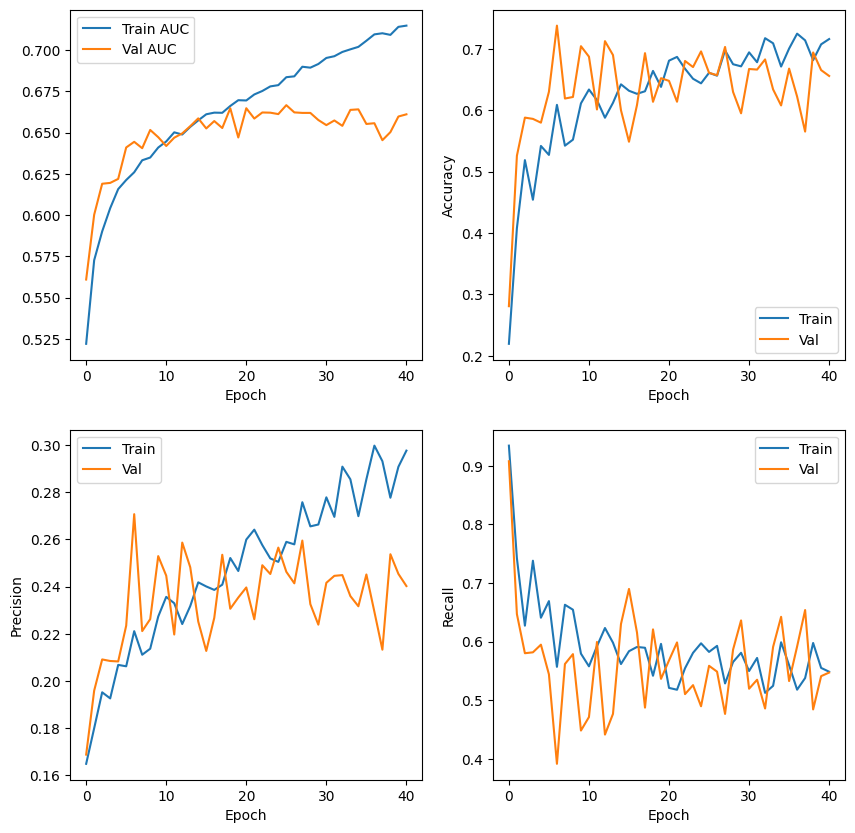

In [12]:
train_auc,val_auc = get_overall_auc(train_preds,val_preds)
train_acc,val_acc,train_precision,val_precision,train_recall,val_recall = get_overall_metrics(train_preds,val_preds)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(train_auc)
plt.plot(val_auc)
plt.legend(['Train AUC','Val AUC'])
plt.xlabel('Epoch')

plt.subplot(2,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(2,2,3)
plt.plot(train_precision)
plt.plot(val_precision)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Precision')

plt.subplot(2,2,4)
plt.plot(train_recall)
plt.plot(val_recall)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Recall')

Text(0, 0.5, 'Recall')

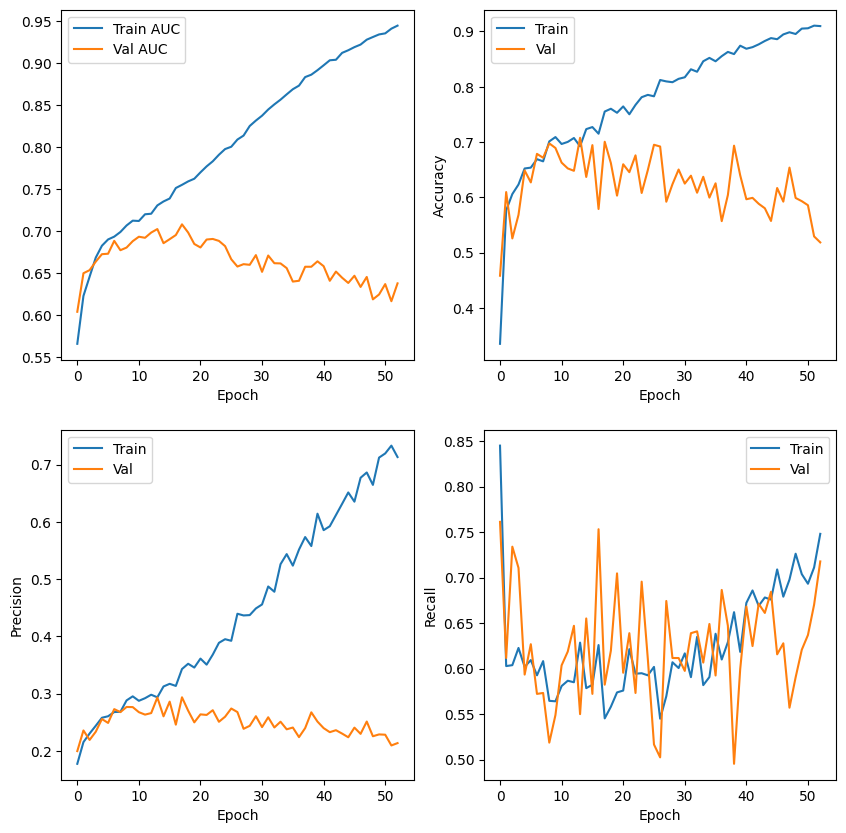

In [26]:
train_auc,val_auc = get_overall_auc(bp_pred_aug_nostop_train_preds, bp_pred_aug_nostop_val_preds)
train_acc,val_acc,train_precision,val_precision,train_recall,val_recall = get_overall_metrics(bp_pred_aug_nostop_train_preds, bp_pred_aug_nostop_val_preds)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(train_auc)
plt.plot(val_auc)
plt.legend(['Train AUC','Val AUC'])
plt.xlabel('Epoch')
# plt.xlim([0,20])
plt.subplot(2,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
# plt.xlim([0,20])

plt.ylabel('Accuracy')
plt.subplot(2,2,3)
plt.plot(train_precision)
plt.plot(val_precision)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
# plt.xlim([0,20])

plt.ylabel('Precision')
plt.subplot(2,2,4)
plt.plot(train_recall)
plt.plot(val_recall)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
# plt.xlim([0,20])

plt.ylabel('Recall')

Text(0, 0.5, 'Recall')

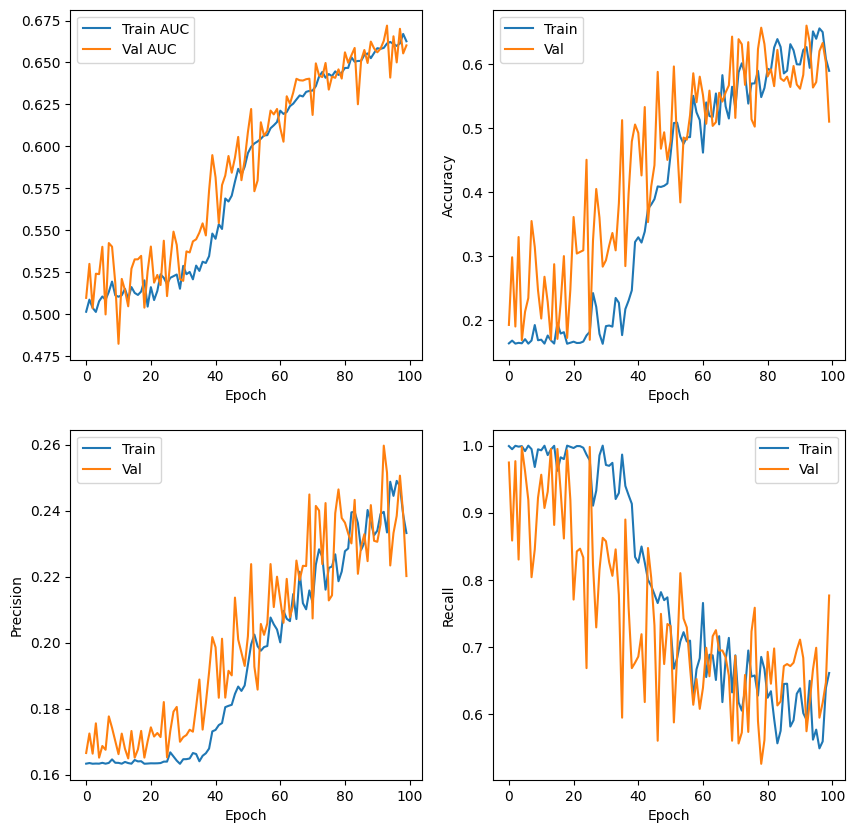

In [28]:
train_auc,val_auc = get_overall_auc(not_pretrained_bp_pred_aug_nostop_train_preds, not_pretrained_bp_pred_aug_nostop_val_preds)
train_acc,val_acc,train_precision,val_precision,train_recall,val_recall = get_overall_metrics(not_pretrained_bp_pred_aug_nostop_train_preds, not_pretrained_bp_pred_aug_nostop_val_preds)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(train_auc)
plt.plot(val_auc)
plt.legend(['Train AUC','Val AUC'])
plt.xlabel('Epoch')

plt.subplot(2,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(2,2,3)
plt.plot(train_precision)
plt.plot(val_precision)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Precision')

plt.subplot(2,2,4)
plt.plot(train_recall)
plt.plot(val_recall)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Recall')

Text(0, 0.5, 'Recall')

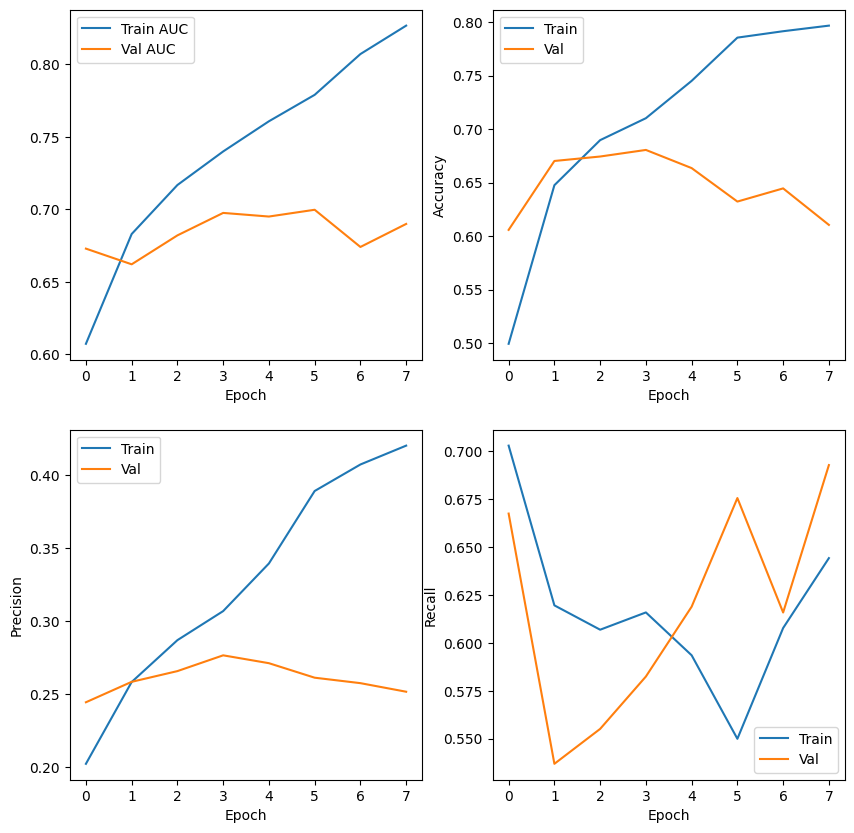

In [29]:
train_auc,val_auc = get_overall_auc(resnet50_bp_pred_train_preds, resnet50_bp_pred_val_preds)
train_acc,val_acc,train_precision,val_precision,train_recall,val_recall = get_overall_metrics(resnet50_bp_pred_train_preds, resnet50_bp_pred_val_preds)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(train_auc)
plt.plot(val_auc)
plt.legend(['Train AUC','Val AUC'])
plt.xlabel('Epoch')

plt.subplot(2,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(2,2,3)
plt.plot(train_precision)
plt.plot(val_precision)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Precision')

plt.subplot(2,2,4)
plt.plot(train_recall)
plt.plot(val_recall)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Recall')

Text(0, 0.5, 'Recall')

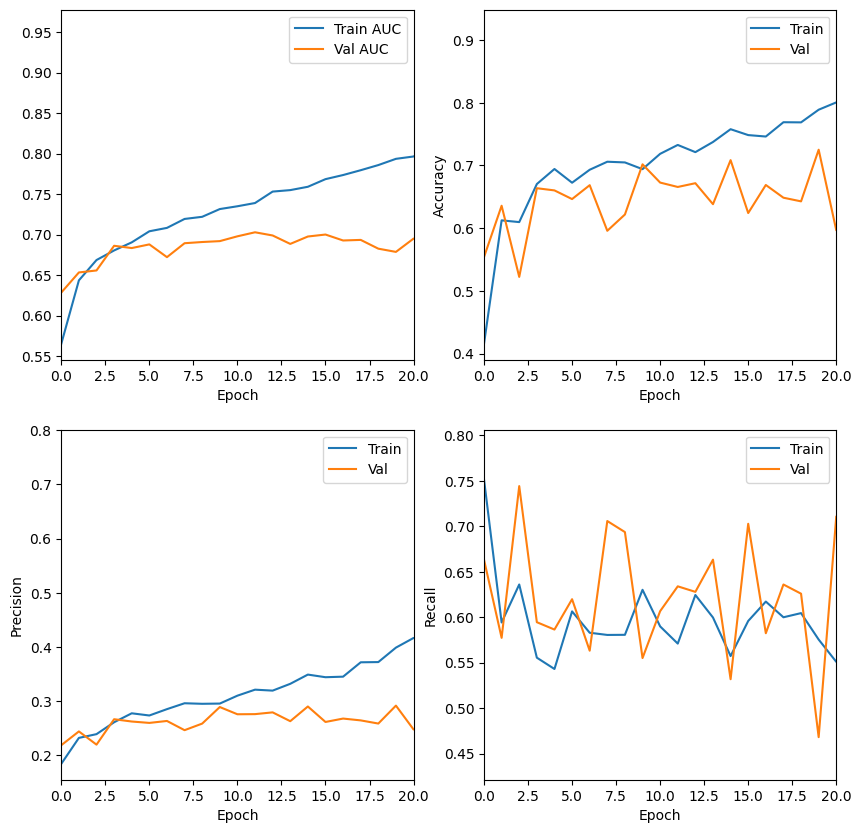

In [33]:
train_auc,val_auc = get_overall_auc(resnet50_bp_pred_aug_nostop_train_preds, resnet50_bp_pred_aug_nostop_val_preds)
train_acc,val_acc,train_precision,val_precision,train_recall,val_recall = get_overall_metrics(resnet50_bp_pred_aug_nostop_train_preds, resnet50_bp_pred_aug_nostop_val_preds)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(train_auc)
plt.plot(val_auc)
plt.legend(['Train AUC','Val AUC'])
plt.xlabel('Epoch')
plt.xlim([0,20])
plt.subplot(2,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.xlim([0,20])

plt.ylabel('Accuracy')
plt.subplot(2,2,3)
plt.plot(train_precision)
plt.plot(val_precision)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.xlim([0,20])

plt.ylabel('Precision')
plt.subplot(2,2,4)
plt.plot(train_recall)
plt.plot(val_recall)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.xlim([0,20])

plt.ylabel('Recall')

Text(0, 0.5, 'Recall')

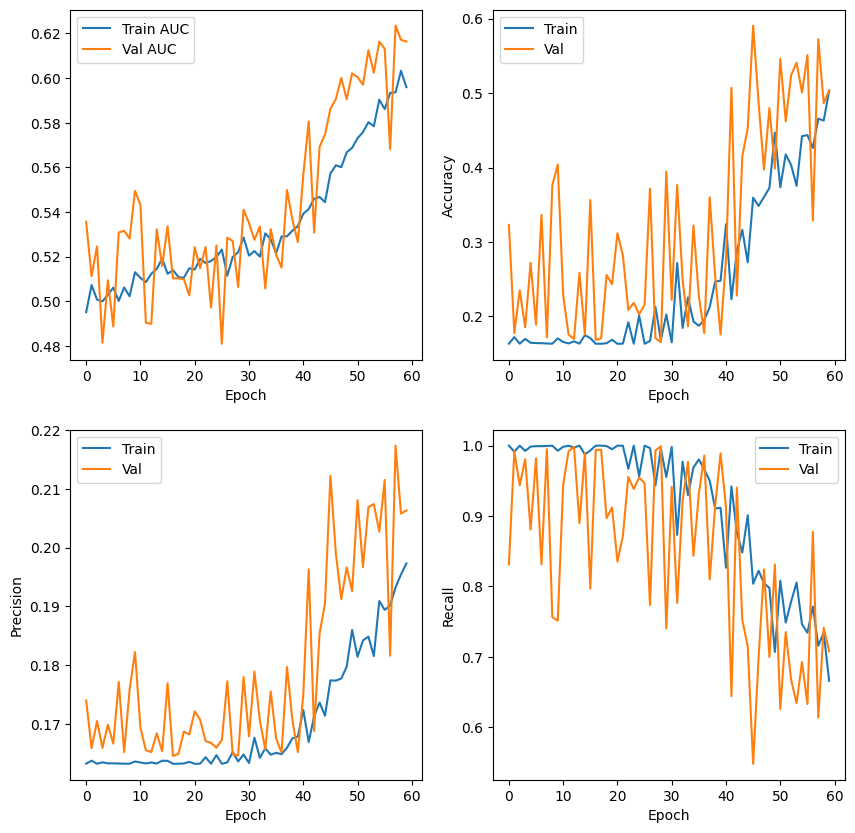

In [32]:
train_auc,val_auc = get_overall_auc(resnet50_bp_pred_aug_nostop_no_pretrain_train_preds, resnet50_bp_pred_aug_nostop_no_pretrain_val_preds)
train_acc,val_acc,train_precision,val_precision,train_recall,val_recall = get_overall_metrics(resnet50_bp_pred_aug_nostop_no_pretrain_train_preds, resnet50_bp_pred_aug_nostop_no_pretrain_val_preds)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(train_auc)
plt.plot(val_auc)
plt.legend(['Train AUC','Val AUC'])
plt.xlabel('Epoch')

plt.subplot(2,2,2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(2,2,3)
plt.plot(train_precision)
plt.plot(val_precision)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Precision')

plt.subplot(2,2,4)
plt.plot(train_recall)
plt.plot(val_recall)
plt.legend(['Train','Val'])
plt.xlabel('Epoch')
plt.ylabel('Recall')

## Get quantitative subgroup results

### Overall gap

In [73]:
subgroups = ['Age_multi','Age_binary','Sex','bmi_cat','alcohol','physical_activity','assessment_centre','deprivation_index','ethnicity','gen_ethnicity']
# remove sex because sex prediction model is used
#subgroups.remove('Sex')
#train_preds,val_preds = sex_pred_train_preds, sex_pred_val_preds
train_preds,val_preds = bp_pred_aug_nostop_train_preds, bp_pred_aug_nostop_val_preds

results_df = make_results_df(train_preds,val_preds,subgroups)# can look at test preds by doing this: [sex_pred_test_preds]
results_df.set_index('Subgroup',inplace=True)

/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results_df = model_results_df.append({'Subgroup':subgroup,'Train Acc':train_acc,'Train Acc Gap':gap_train_acc,'Val Acc':val_acc,'Val Acc Gap':gap_val_acc,'Train Precision':train_precision,'Train Precision Gap':gap_train_precision,'Val Precision':val_precision,'Val Precision Gap':gap_val_precision,'Train Recall':train_recall,'Train Recall Gap':gap_train_recall,'Val Recall':val_recall,'Val Recall Gap':gap_val_recall}, ignore_index = True) #'Train AUC':train_auc, 'Train AUC Gap': gap_train_auc, 'Val AUC': val_auc, 'Val AUC Gap': gap_val_auc},ignore_index=True)
/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [75]:
subset_keys = np.arange(0,10)

# bp_pred_results_df = make_results_df(bp_pred_train_preds, bp_pred_val_preds,subgroups)# can look at test preds by doing
# bp_pred_results_df.set_index('Subgroup',inplace=True)

# for no stop need to get subset of dict so you stop after part where it overfits
bp_pred_aug_nostop_results_df = make_results_df({key: bp_pred_aug_nostop_train_preds[key] for key in subset_keys if key in bp_pred_aug_nostop_train_preds}, {key: bp_pred_aug_nostop_val_preds[key] for key in subset_keys if key in bp_pred_aug_nostop_val_preds},subgroups)
bp_pred_aug_nostop_results_df.set_index('Subgroup',inplace=True)
bp_pred_aug_nostop_results_df

/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results_df = model_results_df.append({'Subgroup':subgroup,'Train Acc':train_acc,'Train Acc Gap':gap_train_acc,'Val Acc':val_acc,'Val Acc Gap':gap_val_acc,'Train Precision':train_precision,'Train Precision Gap':gap_train_precision,'Val Precision':val_precision,'Val Precision Gap':gap_val_precision,'Train Recall':train_recall,'Train Recall Gap':gap_train_recall,'Val Recall':val_recall,'Val Recall Gap':gap_val_recall}, ignore_index = True) #'Train AUC':train_auc, 'Train AUC Gap': gap_train_auc, 'Val AUC': val_auc, 'Val AUC Gap': gap_val_auc},ignore_index=True)
/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

,Train Acc,Train Acc Gap,Val Acc,Val Acc Gap,Train Precision,Train Precision Gap,Val Precision,Val Precision Gap,Train Recall,Train Recall Gap,Val Recall,Val Recall Gap
Subgroup,,,,,,,,,,,,
Age_multi,0.708945,0.122866,0.689196,0.089182,0.295251,0.10444,0.276477,0.149577,0.564158,0.0735,0.549039,0.090324
Age_binary,0.708945,0.084785,0.689196,0.061539,0.295251,0.0336,0.276477,0.0007,0.564158,0.024474,0.549039,0.009714
Sex,0.708945,0.064313,0.689196,0.088174,0.295251,0.067648,0.276477,0.025225,0.564158,0.043507,0.549039,0.03957
bmi_cat,0.708945,0.11795,0.689196,0.117324,0.295251,0.162916,0.276477,0.190071,0.564158,0.026508,0.549039,0.11194
alcohol,0.708945,0.072314,0.689196,0.078443,0.295251,0.045499,0.276477,0.112465,0.564158,0.079865,0.549039,0.072094
physical_activity,0.708945,0.010075,0.689196,0.029039,0.295251,0.009545,0.276477,0.047354,0.564158,0.02818,0.549039,0.072292
assessment_centre,0.708945,0.024488,0.689196,0.055638,0.295251,0.087443,0.276477,0.109466,0.564158,0.036461,0.549039,0.144304
deprivation_index,0.708945,0.004524,0.689196,0.019413,0.295251,0.028758,0.276477,0.032288,0.564158,0.011186,0.549039,0.066741
ethnicity,0.708945,0.114581,0.689196,0.179555,0.295251,0.113803,0.276477,0.060606,0.564158,0.215581,0.549039,0.277964


In [33]:
subgroups = ['Age_multi','Age_binary','Sex','bmi_cat','alcohol','physical_activity','assessment_centre','deprivation_index','ethnicity','gen_ethnicity']
# remove sex because sex prediction model is used
#subgroups.remove('Sex')
#train_preds,val_preds = sex_pred_train_preds, sex_pred_val_preds
train_preds,val_preds = resnet50_bp_pred_train_preds, resnet50_bp_pred_val_preds
resnet50_results_df = make_results_df(train_preds,val_preds,subgroups)# can look at test preds by doing this: [sex_pred_test_preds]
resnet50_results_df.set_index('Subgroup',inplace=True)

/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results_df = model_results_df.append({'Subgroup':subgroup,'Train Acc':train_acc,'Train Acc Gap':gap_train_acc,'Val Acc':val_acc,'Val Acc Gap':gap_val_acc,'Train Precision':train_precision,'Train Precision Gap':gap_train_precision,'Val Precision':val_precision,'Val Precision Gap':gap_val_precision,'Train Recall':train_recall,'Train Recall Gap':gap_train_recall,'Val Recall':val_recall,'Val Recall Gap':gap_val_recall}, ignore_index = True) #'Train AUC':train_auc, 'Train AUC Gap': gap_train_auc, 'Val AUC': val_auc, 'Val AUC Gap': gap_val_auc},ignore_index=True)
/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [34]:
train_preds,val_preds = not_pretrained_bp_pred_train_preds, not_pretrained_bp_pred_val_preds
not_pretrained_results_df = make_results_df(train_preds,val_preds,subgroups)# can look at test preds by doing this: [sex_pred_test_preds]
not_pretrained_results_df.set_index('Subgroup',inplace=True)

/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results_df = model_results_df.append({'Subgroup':subgroup,'Train Acc':train_acc,'Train Acc Gap':gap_train_acc,'Val Acc':val_acc,'Val Acc Gap':gap_val_acc,'Train Precision':train_precision,'Train Precision Gap':gap_train_precision,'Val Precision':val_precision,'Val Precision Gap':gap_val_precision,'Train Recall':train_recall,'Train Recall Gap':gap_train_recall,'Val Recall':val_recall,'Val Recall Gap':gap_val_recall}, ignore_index = True) #'Train AUC':train_auc, 'Train AUC Gap': gap_train_auc, 'Val AUC': val_auc, 'Val AUC Gap': gap_val_auc},ignore_index=True)
/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [17]:
train_preds,val_preds = all_bp_pred_aug_nostop_train_preds, all_bp_pred_aug_nostop_val_preds
all_bp_results_df = make_results_df(train_preds,val_preds,subgroups)# can look at test preds by doing this: [sex_pred_test_preds]
all_bp_results_df.set_index('Subgroup',inplace=True)

/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results_df = model_results_df.append({'Subgroup':subgroup,'Train Acc':train_acc,'Train Acc Gap':gap_train_acc,'Val Acc':val_acc,'Val Acc Gap':gap_val_acc,'Train Precision':train_precision,'Train Precision Gap':gap_train_precision,'Val Precision':val_precision,'Val Precision Gap':gap_val_precision,'Train Recall':train_recall,'Train Recall Gap':gap_train_recall,'Val Recall':val_recall,'Val Recall Gap':gap_val_recall}, ignore_index = True) #'Train AUC':train_auc, 'Train AUC Gap': gap_train_auc, 'Val AUC': val_auc, 'Val AUC Gap': gap_val_auc},ignore_index=True)
/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [18]:
all_bp_results_df

,Train Acc,Train Acc Gap,Val Acc,Val Acc Gap,Train Precision,Train Precision Gap,Val Precision,Val Precision Gap,Train Recall,Train Recall Gap,Val Recall,Val Recall Gap
Subgroup,,,,,,,,,,,,
Age_multi,0.716045,0.084282,0.655902,0.215554,0.297635,0.140918,0.240229,0.143589,0.548606,0.178856,0.547199,0.071971
Age_binary,0.716045,0.054788,0.655902,0.119975,0.297635,0.033451,0.240229,0.042573,0.548606,0.053517,0.547199,0.010173
Sex,0.716045,0.071265,0.655902,0.078533,0.297635,0.061875,0.240229,0.053893,0.548606,0.060341,0.547199,0.085121
bmi_cat,0.716045,0.09495,0.655902,0.103999,0.297635,0.193456,0.240229,0.154988,0.548606,0.067101,0.547199,0.047302
alcohol,0.716045,0.0489,0.655902,0.081178,0.297635,0.034639,0.240229,0.084937,0.548606,0.069243,0.547199,0.097902
physical_activity,0.716045,0.006007,0.655902,0.018188,0.297635,0.01235,0.240229,0.011598,0.548606,0.034543,0.547199,0.084402
assessment_centre,0.716045,0.029128,0.655902,0.079242,0.297635,0.117767,0.240229,0.126767,0.548606,0.146379,0.547199,0.027453
deprivation_index,0.716045,0.005065,0.655902,0.031928,0.297635,0.041426,0.240229,0.035576,0.548606,0.032297,0.547199,0.069176
ethnicity,0.716045,0.107583,0.655902,0.116016,0.297635,0.057394,0.240229,0.058745,0.548606,0.14932,0.547199,0.145912


In [49]:
all_bp_results_df['Val Acc Gap'].mean() + all_bp_results_df['Val Precision Gap'].mean() + all_bp_results_df['Val Recall Gap'].mean()

0.2286971653470531

In [50]:
bp_pred_aug_nostop_results_df['Val Acc Gap'].mean() + bp_pred_aug_nostop_results_df['Val Precision Gap'].mean() + bp_pred_aug_nostop_results_df['Val Recall Gap'].mean()

0.2485863361355493

In [30]:
bp_pred_aug_nostop_results_df

,Train Acc,Train Acc Gap,Val Acc,Val Acc Gap,Train Precision,Train Precision Gap,Val Precision,Val Precision Gap,Train Recall,Train Recall Gap,Val Recall,Val Recall Gap
Subgroup,,,,,,,,,,,,
Age_multi,0.708945,0.122866,0.689196,0.089182,0.295251,0.10444,0.276477,0.149577,0.564158,0.0735,0.549039,0.090324
Age_binary,0.708945,0.084785,0.689196,0.061539,0.295251,0.0336,0.276477,0.0007,0.564158,0.024474,0.549039,0.009714
Sex,0.708945,0.064313,0.689196,0.088174,0.295251,0.067648,0.276477,0.025225,0.564158,0.043507,0.549039,0.03957
bmi_cat,0.708945,0.11795,0.689196,0.117324,0.295251,0.162916,0.276477,0.190071,0.564158,0.026508,0.549039,0.11194
alcohol,0.708945,0.072314,0.689196,0.078443,0.295251,0.045499,0.276477,0.112465,0.564158,0.079865,0.549039,0.072094
physical_activity,0.708945,0.010075,0.689196,0.029039,0.295251,0.009545,0.276477,0.047354,0.564158,0.02818,0.549039,0.072292
assessment_centre,0.708945,0.024488,0.689196,0.055638,0.295251,0.087443,0.276477,0.109466,0.564158,0.036461,0.549039,0.144304
deprivation_index,0.708945,0.004524,0.689196,0.019413,0.295251,0.028758,0.276477,0.032288,0.564158,0.011186,0.549039,0.066741
ethnicity,0.708945,0.114581,0.689196,0.179555,0.295251,0.113803,0.276477,0.060606,0.564158,0.215581,0.549039,0.277964


In [29]:
subset_keys = np.arange(0,10)

# bp_pred_results_df = make_results_df(bp_pred_train_preds, bp_pred_val_preds,subgroups)# can look at test preds by doing
# bp_pred_results_df.set_index('Subgroup',inplace=True)

# for no stop need to get subset of dict so you stop after part where it overfits
bp_pred_aug_nostop_results_df = make_results_df({key: bp_pred_aug_nostop_train_preds[key] for key in subset_keys if key in bp_pred_aug_nostop_train_preds}, {key: bp_pred_aug_nostop_val_preds[key] for key in subset_keys if key in bp_pred_aug_nostop_val_preds},subgroups)
bp_pred_aug_nostop_results_df.set_index('Subgroup',inplace=True)

not_pretrained_bp_pred_aug_nostop_results_df = make_results_df(not_pretrained_bp_pred_aug_nostop_train_preds, not_pretrained_bp_pred_aug_nostop_val_preds,subgroups)
not_pretrained_bp_pred_aug_nostop_results_df.set_index('Subgroup',inplace=True)

resnet50_bp_pred_results_df = make_results_df(resnet50_bp_pred_train_preds, resnet50_bp_pred_val_preds,subgroups)
resnet50_bp_pred_results_df.set_index('Subgroup',inplace=True)

resnet50_bp_pred_aug_nostop_results_df = make_results_df({key: resnet50_bp_pred_aug_nostop_train_preds[key] for key in subset_keys if key in resnet50_bp_pred_aug_nostop_train_preds}, {key: resnet50_bp_pred_aug_nostop_val_preds[key] for key in subset_keys if key in resnet50_bp_pred_aug_nostop_val_preds},subgroups)
resnet50_bp_pred_aug_nostop_results_df.set_index('Subgroup',inplace=True)

resnet50_bp_pred_aug_nostop_no_pretrain_results_df = make_results_df(resnet50_bp_pred_aug_nostop_no_pretrain_train_preds, resnet50_bp_pred_aug_nostop_no_pretrain_val_preds,subgroups)
resnet50_bp_pred_aug_nostop_no_pretrain_results_df.set_index('Subgroup',inplace=True)

/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results_df = model_results_df.append({'Subgroup':subgroup,'Train Acc':train_acc,'Train Acc Gap':gap_train_acc,'Val Acc':val_acc,'Val Acc Gap':gap_val_acc,'Train Precision':train_precision,'Train Precision Gap':gap_train_precision,'Val Precision':val_precision,'Val Precision Gap':gap_val_precision,'Train Recall':train_recall,'Train Recall Gap':gap_train_recall,'Val Recall':val_recall,'Val Recall Gap':gap_val_recall}, ignore_index = True) #'Train AUC':train_auc, 'Train AUC Gap': gap_train_auc, 'Val AUC': val_auc, 'Val AUC Gap': gap_val_auc},ignore_index=True)
/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/mynotebooks/results_utils.py:324: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

NameError: name 'not_pretrained_bp_pred_aug_nostop_train_preds' is not defined

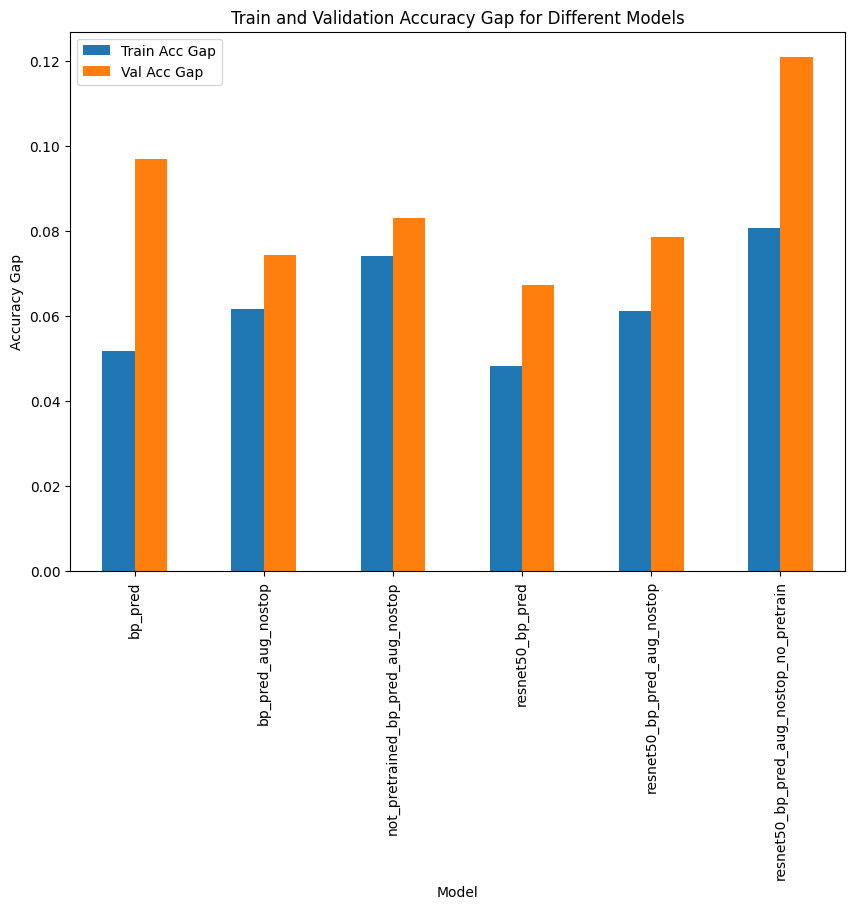

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to hold the values
df = pd.DataFrame({
    'Model': ['bp_pred', 'bp_pred_aug_nostop', 'not_pretrained_bp_pred_aug_nostop', 'resnet50_bp_pred', 'resnet50_bp_pred_aug_nostop', 'resnet50_bp_pred_aug_nostop_no_pretrain'],
    'Train Acc Gap': [
        bp_pred_results_df['Train Acc Gap'].mean(),
        bp_pred_aug_nostop_results_df['Train Acc Gap'].mean(),
        not_pretrained_bp_pred_aug_nostop_results_df['Train Acc Gap'].mean(),
        resnet50_bp_pred_results_df['Train Acc Gap'].mean(),
        resnet50_bp_pred_aug_nostop_results_df['Train Acc Gap'].mean(),
        resnet50_bp_pred_aug_nostop_no_pretrain_results_df['Train Acc Gap'].mean()
    ],
    'Val Acc Gap': [
        bp_pred_results_df['Val Acc Gap'].mean(),
        bp_pred_aug_nostop_results_df['Val Acc Gap'].mean(),
        not_pretrained_bp_pred_aug_nostop_results_df['Val Acc Gap'].mean(),
        resnet50_bp_pred_results_df['Val Acc Gap'].mean(),
        resnet50_bp_pred_aug_nostop_results_df['Val Acc Gap'].mean(),
        resnet50_bp_pred_aug_nostop_no_pretrain_results_df['Val Acc Gap'].mean()
    ]
})

# Plot the values
df.plot(x='Model', y=['Train Acc Gap', 'Val Acc Gap'], kind='bar', figsize=(10, 7))
plt.ylabel('Accuracy Gap')
plt.title('Train and Validation Accuracy Gap for Different Models')
plt.show()

<AxesSubplot:title={'center':'Performance differences resnet18 with aug + no stop'}, xlabel='Subgroup', ylabel='Min/max gap'>

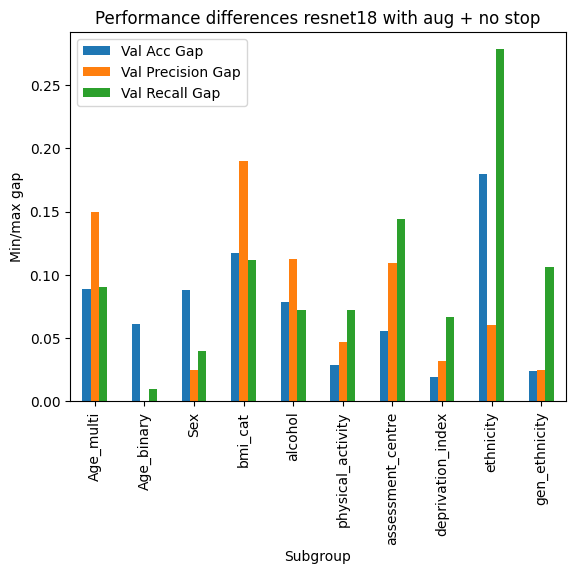

In [93]:
# best model:
val_results_df = bp_pred_aug_nostop_results_df[['Val Acc Gap','Val Precision Gap','Val Recall Gap']]
val_results_df.plot(kind='bar', ylabel='Min/max gap', title='Performance differences resnet18 with aug + no stop')

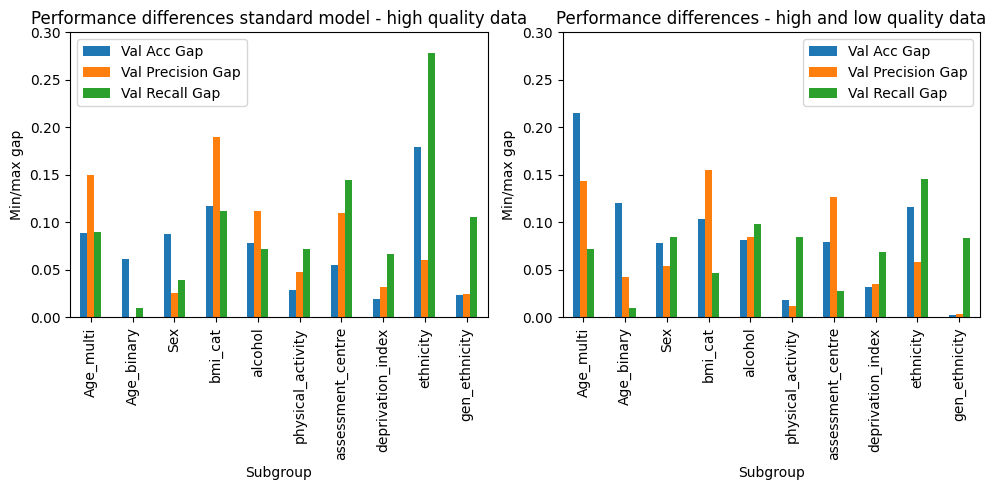

In [45]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first graph
val_results_df = bp_pred_aug_nostop_results_df[['Val Acc Gap','Val Precision Gap','Val Recall Gap']]
val_results_df.plot(kind='bar', ax=axs[0], ylabel='Min/max gap', title='Performance differences standard model - high quality data')

# Plot the second graph
val_results_df = all_bp_results_df[['Val Acc Gap','Val Precision Gap','Val Recall Gap']]
val_results_df.plot(kind='bar', ax=axs[1], ylabel='Min/max gap', title='Performance differences - high and low quality data')

# make y axis the same between plots
axs[0].set_ylim(0, 0.3)
axs[1].set_ylim(0, 0.3)

# Display the plots
plt.tight_layout()
plt.show()

### Analyse each subgroup performance

In [96]:
subgroups = ['Age_multi','Age_binary','Sex','bmi_cat','alcohol','physical_activity','assessment_centre','deprivation_index','ethnicity','gen_ethnicity']
#subgroups.remove('Sex')
train_preds,val_preds =resnet50_bp_pred_train_preds, resnet50_bp_pred_val_preds
train_preds,val_preds = {key: bp_pred_aug_nostop_train_preds[key] for key in subset_keys if key in bp_pred_aug_nostop_train_preds}, {key: bp_pred_aug_nostop_val_preds[key] for key in subset_keys if key in bp_pred_aug_nostop_val_preds}

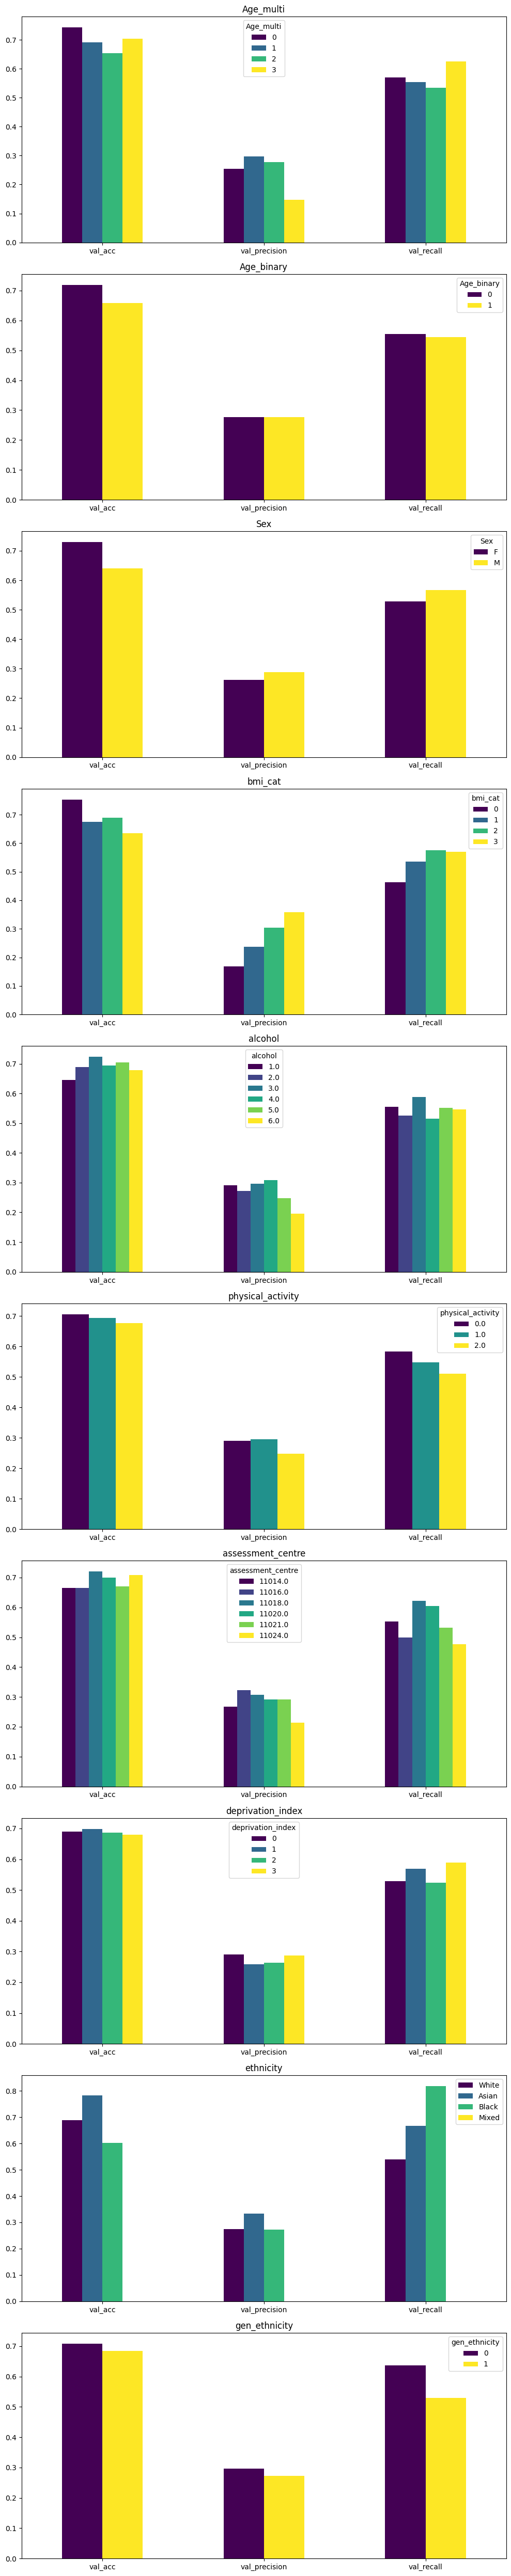

In [79]:
# BP prediction with all data
train_preds,val_preds= {key: bp_pred_aug_nostop_train_preds[key] for key in subset_keys if key in bp_pred_aug_nostop_train_preds}, {key: bp_pred_aug_nostop_val_preds[key] for key in subset_keys if key in bp_pred_aug_nostop_val_preds}

fig, axs = plt.subplots(len(subgroups), figsize=(10, 5*len(subgroups)))

for i, col_name in enumerate(subgroups):
    train_acc_list, train_precision_list, train_recall_list, train_f1_list = get_subgroup_stats(train_preds, col_name)
    val_acc_list, val_precision_list, val_recall_list, val_f1_list = get_subgroup_stats(val_preds, col_name)
    train_auc_list = get_subgroup_auc(train_preds,col_name)
    val_auc_list = get_subgroup_auc(val_preds,col_name)
    
    bmi_df = pd.DataFrame({'train_acc':train_acc_list[-1],'val_acc':val_acc_list[-1],'train_precision':train_precision_list[-1],'val_precision':val_precision_list[-1],'train_recall':train_recall_list[-1],'val_recall':val_recall_list[-1],'train_f1':train_f1_list[-1],'val_f1':val_f1_list[-1],'train_auc':train_auc_list[-1],'val_auc':val_auc_list[-1]})
    val_grouped_df = bmi_df[['val_acc','val_precision','val_recall']]

    val_grouped_df.T.plot(kind='bar',cmap='viridis', ax=axs[i])
    if col_name == 'ethnicity':
        legend_labels = ['White', 'Asian', 'Black', 'Mixed']
        axs[i].legend(legend_labels)
    axs[i].set_title(col_name)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)  # make x axis labels horizontal


plt.tight_layout()
plt.show()

## Plot subgroup statistics during training

In [ ]:

bp_pred_train_preds, bp_pred_val_preds
bp_pred_aug_nostop_train_preds, bp_pred_aug_nostop_val_preds
not_pretrained_bp_pred_aug_nostop_train_preds, not_pretrained_bp_pred_aug_nostop_val_preds
resnet50_bp_pred_train_preds, resnet50_bp_pred_val_preds
resnet50_bp_pred_aug_nostop_train_preds, resnet50_bp_pred_aug_nostop_val_preds
resnet50_bp_pred_aug_nostop_no_pretrain_train_preds, resnet50_bp_pred_aug_nostop_no_pretrain_val_preds

In [52]:
train_preds,val_preds = all_bp_pred_aug_nostop_train_preds, all_bp_pred_aug_nostop_val_preds

subgroups = ['Age_multi','Age_binary','Sex','bmi_cat','alcohol','physical_activity','assessment_centre','deprivation_index','ethnicity','gen_ethnicity']


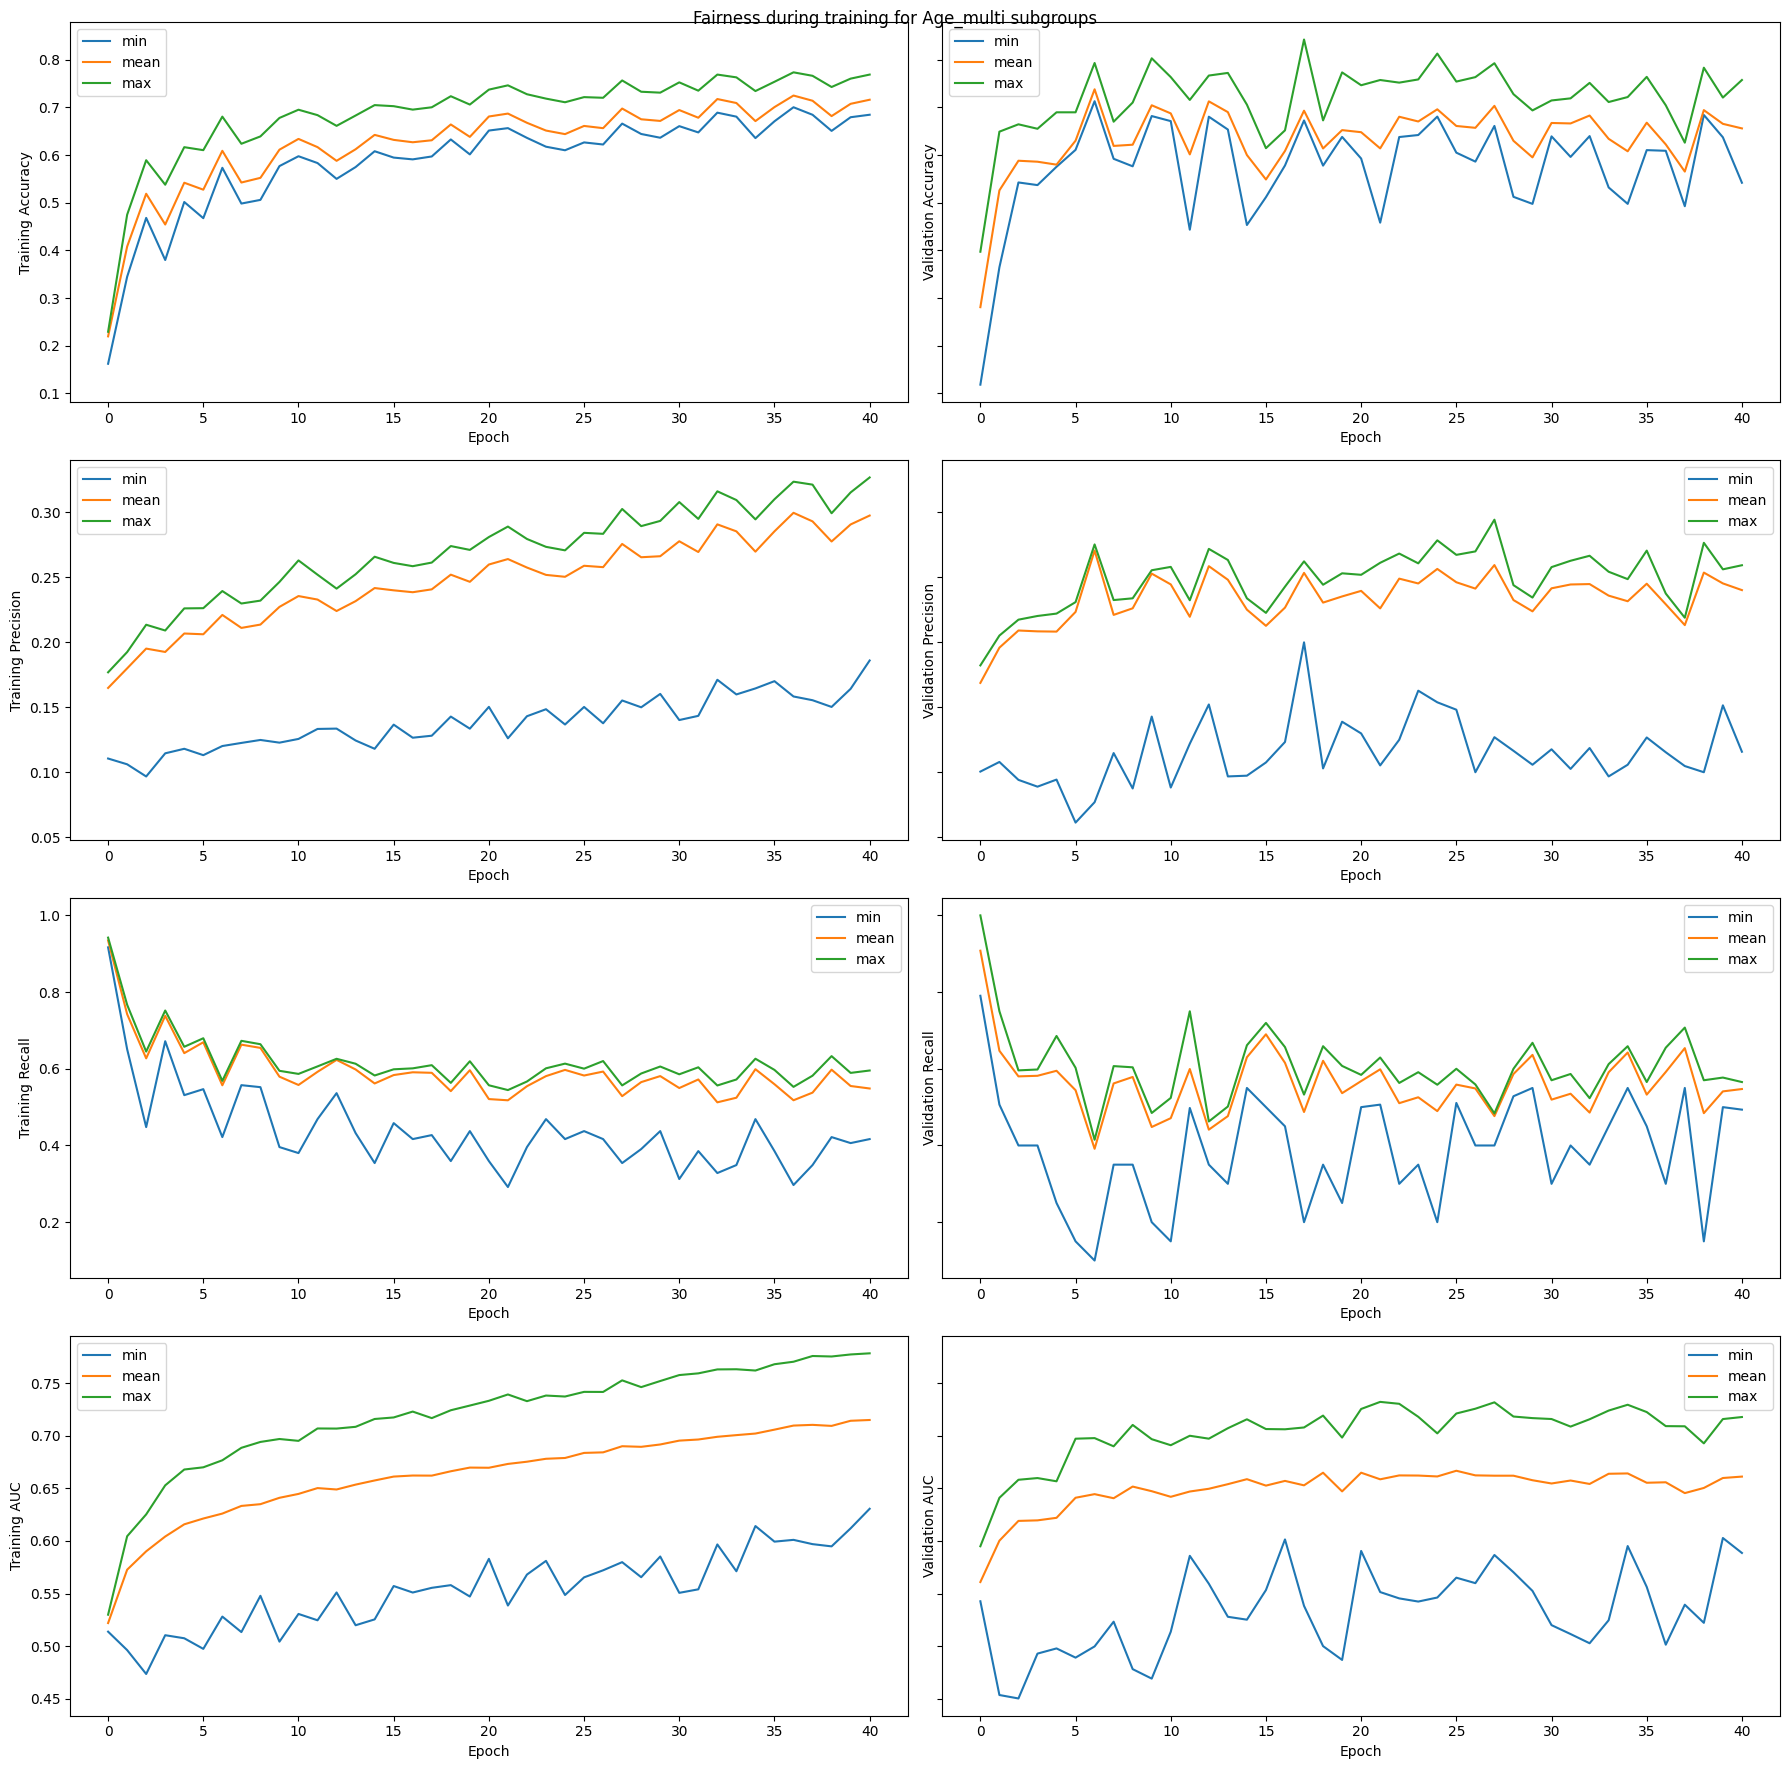

In [54]:

plot_subgroup_stats(train_preds,val_preds,'Age_multi',plot_gap=False,plot_auc=True)


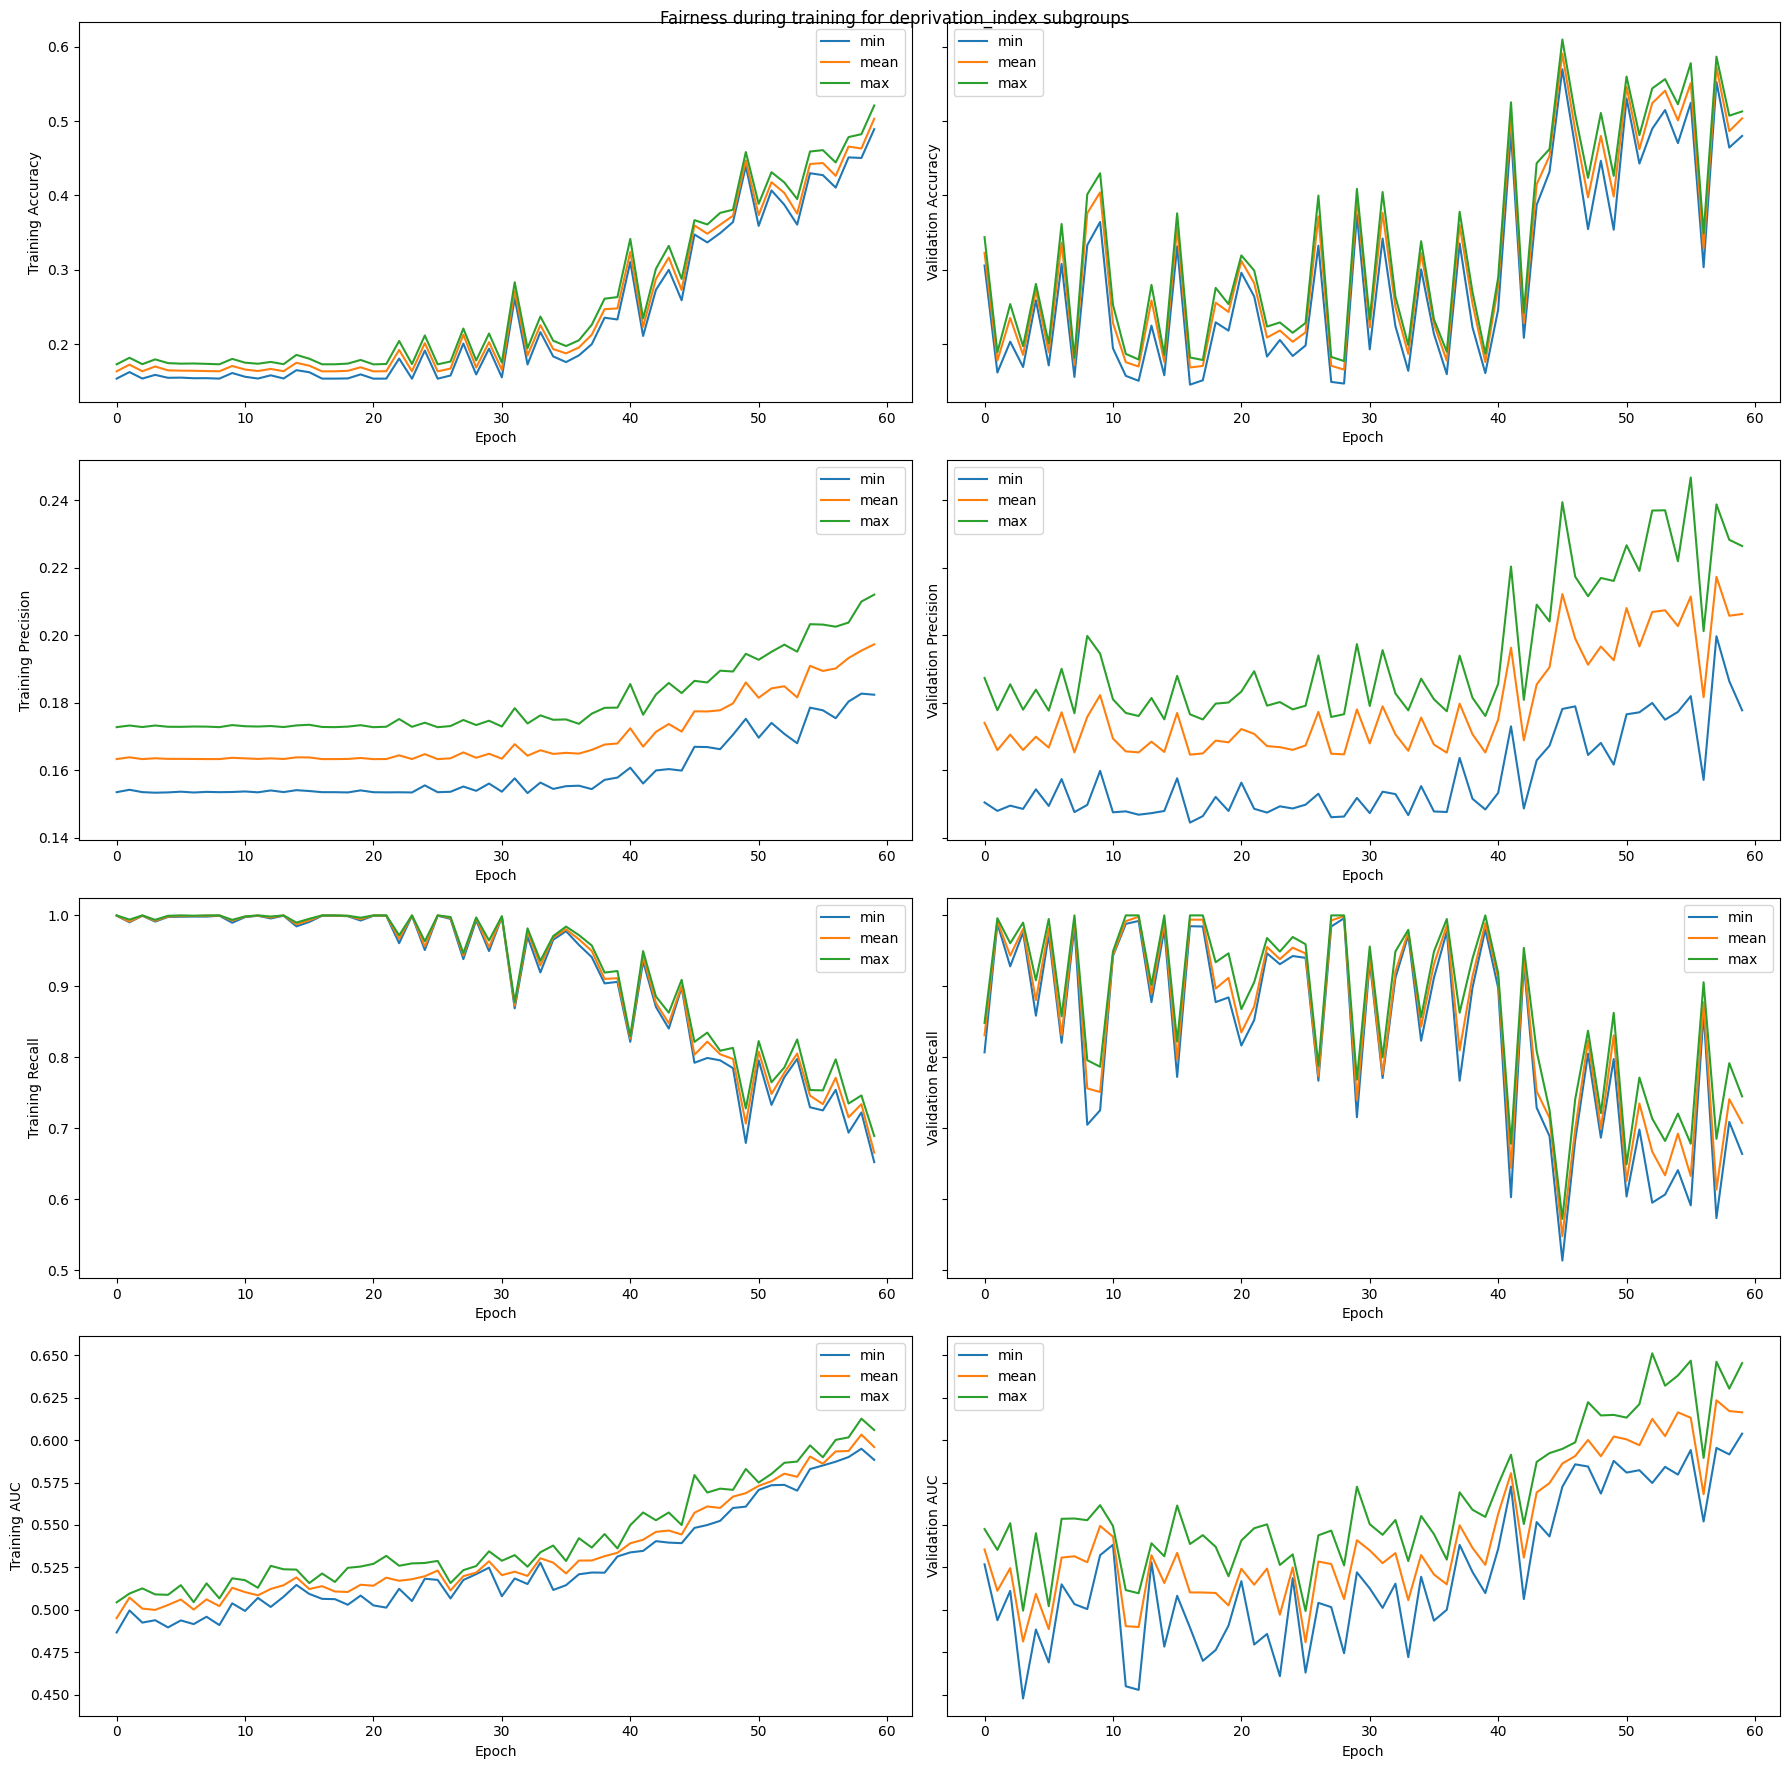

In [81]:
plot_subgroup_stats(train_preds,val_preds,'deprivation_index',plot_gap=False,plot_auc=True)


## Analyse fairness generalisation gap with different dataset sizes


0.01


0.02
0.1
0.2
0.5
1.0


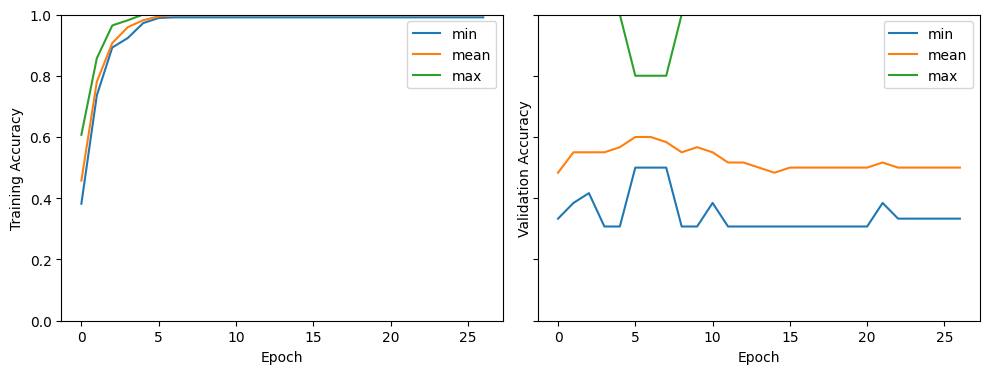

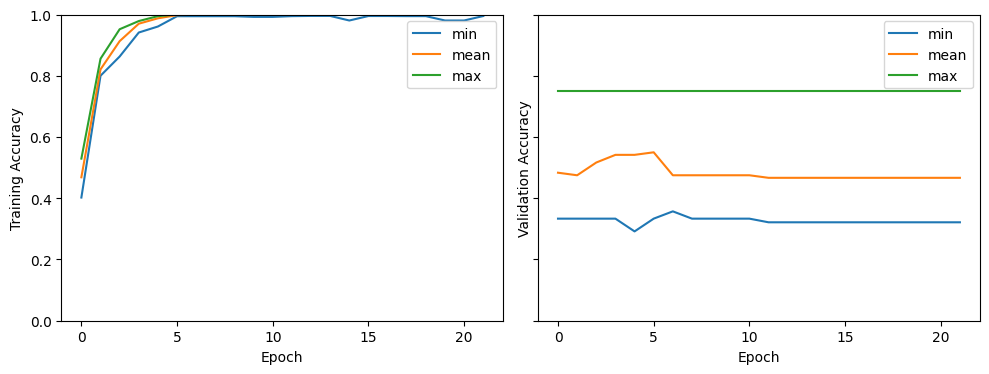

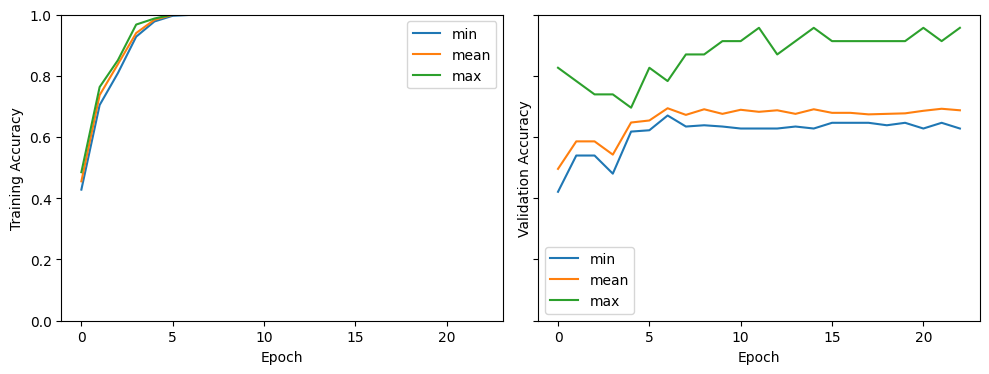

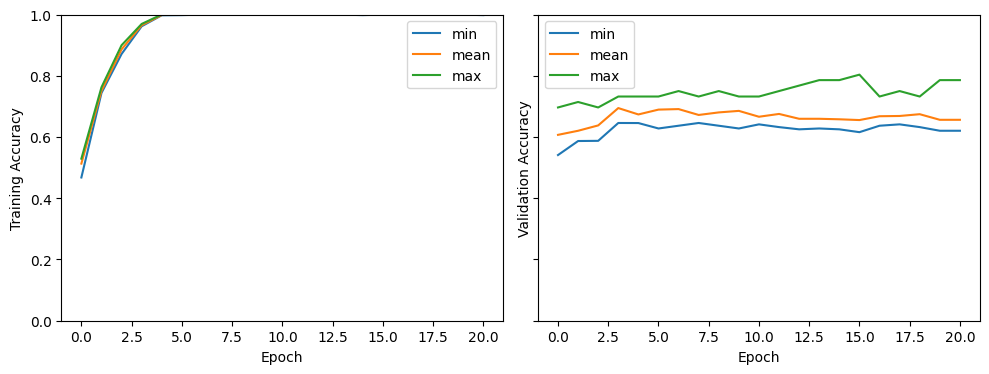

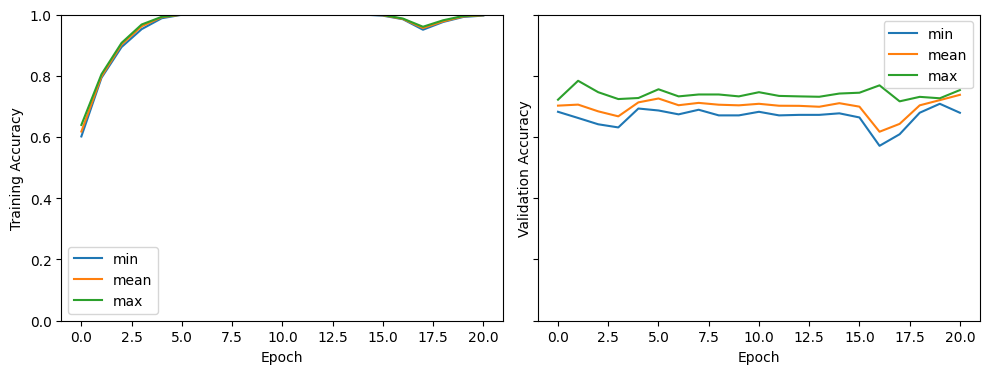

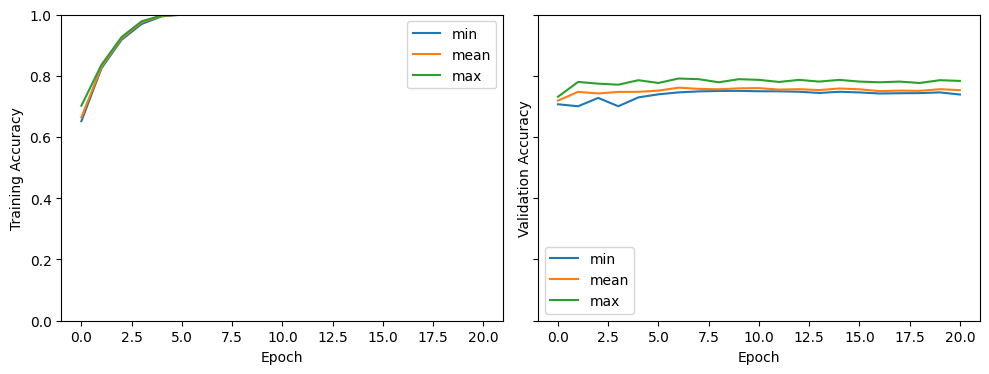

In [ ]:

ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'

possible_sizes = ['0.01','0.02','0.1','0.2','0.5','1.0']
possible_props = ['001','002','010','020','050','100']
results_dict = {}
for i in range(len(possible_sizes)):
    dataset_size = possible_sizes[i]
    dataset_prop = possible_props[i]

    results_folder = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/sex_pred_' +dataset_prop  +'/'
    path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-sex' + dataset_size + '.csv'
    path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-sex' + dataset_size + '.csv'
    path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-sex' + dataset_size + '.csv'

    sex_pred_train_preds, sex_pred_val_preds= get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    #sex_pred_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)
    results_dict[dataset_size] = sex_pred_train_preds,sex_pred_val_preds

def plot_subgroup_auc(train_preds, val_preds, col_name,plot_gap=False,plot_auc=False):

    fig, axs = plt.subplots(1, 2, sharey='row', figsize=(10, 4))

    train_acc_list, train_precision_list, train_recall_list, train_f1_list = get_subgroup_stats(train_preds, col_name)
    val_acc_list, val_precision_list, val_recall_list, val_f1_list = get_subgroup_stats(val_preds, col_name)
    overall_train_acc,overall_val_acc,overall_train_precision,overall_val_precision,overall_train_recall,overall_val_recall = get_overall_metrics(train_preds,val_preds)


    make_subplots(axs[0], train_acc_list, overall_train_acc, 'Training Accuracy',plot_gap=plot_gap)
    make_subplots(axs[1], val_acc_list, overall_val_acc, 'Validation Accuracy',plot_gap=plot_gap)
    axs[0].set_ylim([0,1])
    axs[0].set_title('')
    axs[1].set_ylim([0,1])
    axs[0].set_title('')


    plt.suptitle('')
    plt.tight_layout()
    
for i in range(len(possible_sizes)):
    dataset_size = possible_sizes[i]
    print(dataset_size)
    sex_pred_train_preds, sex_pred_val_preds = results_dict[dataset_size][0], results_dict[dataset_size][1]
    plot_subgroup_auc(sex_pred_train_preds,sex_pred_val_preds,'assessment_centre',plot_gap=False,plot_auc=True)

## Analyse test set results

### Quantitative results

In [2]:
# testing on the same filtered dataset (by ethnicity) and only high quality
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'

results_folder = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/bp_pred_aug_high_qual_test/'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-bp-filt.csv'
bp_pred_aug_nostop_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)

results_folder = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Sex/cusResNet18/baseline/all_bp_pred_aug_high_qual_test/'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-bp-high-qual-filt2.csv'
all_bp_pred_aug_nostop_test_preds = preprocess_ukbb_data(results_folder+'pretrained_test_pred.csv',path_to_test_splits)


In [6]:
# correct for mistake i made when splitting data
train_images_df = pd.read_csv(ROOT + 'data/ukbb-ret/splits/train-bp-all.csv')
# remove rows from test preds if 'eid' is in train df 'eid'
train_eids = train_images_df['eid'].values
all_bp_pred_aug_nostop_test_preds=all_bp_pred_aug_nostop_test_preds[~all_bp_pred_aug_nostop_test_preds['eid'].isin(train_eids)]


In [10]:
test_df = bp_pred_aug_nostop_test_preds
print('accuracy:', len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df))
print('precision:', len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])))
print('recall:', len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])))
print('auc: ', roc_auc_score(test_df['binary_label'], test_df['raw_pred']))

accuracy: 0.7248446161599194
precision: 0.3117408906882591
recall: 0.5460992907801419
auc:  0.7088350734334916


In [7]:
test_df = all_bp_pred_aug_nostop_test_preds
print('accuracy:', len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df))
print('precision:', len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])))
print('recall:', len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])))
print('auc: ', roc_auc_score(test_df['binary_label'], test_df['raw_pred']))

accuracy: 0.7500504744599232
precision: 0.30743243243243246
recall: 0.46547314578005117
auc:  0.7006084516093032


In [8]:
# old results from 1200 rows no overlap
test_df = all_bp_pred_aug_nostop_test_preds
print('accuracy:', len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df))
print('precision:', len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])))
print('recall:', len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])))
print('auc: ', roc_auc_score(test_df['binary_label'], test_df['raw_pred']))

accuracy: 0.6450540315876975
precision: 0.2968127490039841
recall: 0.6681614349775785
auc:  0.6957170312071017


In [11]:
# old results from dataset with overlap
test_df = all_bp_pred_aug_nostop_test_preds
print('accuracy:', len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df))
print('precision:', len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])))
print('recall:', len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])))
print('auc: ', roc_auc_score(test_df['binary_label'], test_df['raw_pred']))

accuracy: 0.6581555518226104
precision: 0.28001679261125106
recall: 0.6757852077001013
auc:  0.7188645708752648


In [4]:
bp_pred_aug_nostop_test_preds['income']=pd.cut(bp_pred_aug_nostop_test_preds['26411-0.0'], bins=[0,0.05,0.1,0.2,1], labels=[0,1,2,3])
all_bp_pred_aug_nostop_test_preds['income']=pd.cut(all_bp_pred_aug_nostop_test_preds['26411-0.0'], bins=[0,0.05,0.1,0.2,1], labels=[0,1,2,3])

In [5]:
subgroups = ['Age_multi','Age_binary','Sex','bmi_cat','alcohol','physical_activity','assessment_centre','deprivation_index','ethnicity','gen_ethnicity','income']

from mynotebooks.results_utils import *
bp_pred_aug_nostop_test_results_df = make_test_results_df([bp_pred_aug_nostop_test_preds],subgroups)
bp_pred_aug_nostop_test_results_df.set_index('Subgroup',inplace=True)

all_bp_pred_aug_nostop_test_results_df = make_test_results_df([all_bp_pred_aug_nostop_test_preds],subgroups)
all_bp_pred_aug_nostop_test_results_df.set_index('Subgroup',inplace=True)

In [13]:
bp_pred_aug_nostop_test_results_df.round(3).sort_values('Test AUC Gap',ascending=False)

,Test Acc,Test Acc Gap,Test Precision,Test Precision Gap,Test Recall,Test Recall Gap,Test AUC,Test AUC Gap
Subgroup,,,,,,,,
Age_multi,0.725,0.149,0.312,0.103,0.546,0.239,0.709,0.142
assessment_centre,0.725,0.053,0.312,0.131,0.546,0.141,0.709,0.094
Age_binary,0.725,0.100,0.312,0.045,0.546,0.019,0.709,0.091
alcohol,0.725,0.084,0.312,0.114,0.546,0.156,0.709,0.083
ethnicity,0.725,0.091,0.312,0.076,0.546,0.188,0.709,0.067
bmi_cat,0.725,0.100,0.312,0.196,0.546,0.116,0.709,0.065
income,0.725,0.021,0.312,0.076,0.546,0.040,0.709,0.053
deprivation_index,0.725,0.032,0.312,0.073,0.546,0.067,0.709,0.049
Sex,0.725,0.067,0.312,0.082,0.546,0.074,0.709,0.044


In [14]:
all_bp_pred_aug_nostop_test_results_df.round(3).sort_values('Test AUC Gap',ascending=False)

,Test Acc,Test Acc Gap,Test Precision,Test Precision Gap,Test Recall,Test Recall Gap,Test AUC,Test AUC Gap
Subgroup,,,,,,,,
Age_multi,0.75,0.231,0.307,0.183,0.465,0.035,0.701,0.235
ethnicity,0.75,0.076,0.307,0.298,0.465,0.417,0.701,0.169
assessment_centre,0.75,0.104,0.307,0.282,0.465,0.178,0.701,0.152
physical_activity,0.75,0.033,0.307,0.087,0.465,0.133,0.701,0.067
Age_binary,0.75,0.072,0.307,0.077,0.465,0.006,0.701,0.065
income,0.75,0.038,0.307,0.083,0.465,0.098,0.701,0.061
alcohol,0.75,0.060,0.307,0.119,0.465,0.144,0.701,0.047
deprivation_index,0.75,0.022,0.307,0.046,0.465,0.114,0.701,0.047
bmi_cat,0.75,0.153,0.307,0.154,0.465,0.097,0.701,0.045


In [15]:
print(bp_pred_aug_nostop_test_results_df['Test AUC Gap'].mean())
print(all_bp_pred_aug_nostop_test_results_df['Test AUC Gap'].mean())

print(bp_pred_aug_nostop_test_results_df['Test Acc Gap'].mean())
print(all_bp_pred_aug_nostop_test_results_df['Test Acc Gap'].mean())

0.06724552849396288
0.08475201663461168
0.06516909552903669
0.07998383808540774


### Plots

In [8]:
test_csv

,Unnamed: 0.1,Unnamed: 0,image.id,eid,image.instance,image.array,age_at_imaging,Sex,bmi_at_imaging,Age_multi,...,26410,54,21000_x,22006_x,21000_y,22006_y,21000,22006,26411-0.0,Age_multi4
0,0,7,1000289_21015_0_0.png,1000289,0,0,43.000000,M,27.9,0,...,7.36,11020.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,0.05,0
1,1,18,1000890_21015_0_0.png,1000890,0,0,63.000000,F,23.0,2,...,14.95,11018.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,0.10,2
2,2,23,1001430_21015_0_0.png,1001430,0,0,57.000000,F,21.7,1,...,10.10,11014.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,0.05,1
3,3,25,1001854_21015_0_0.png,1001854,0,0,44.000000,M,27.3,0,...,NaN,11020.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,NaN,0
4,4,31,1002206_21015_1_0.png,1002206,1,0,57.450549,M,27.6,1,...,13.46,11024.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,0.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,6059,60278,6019917_21015_1_0.png,6019917,1,0,61.876374,F,35.7,2,...,15.07,11024.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,0.07,2
6060,6060,60299,6021687_21015_1_0.png,6021687,1,0,66.021978,M,24.6,2,...,10.46,11024.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,0.06,2
6061,6061,60306,6022273_21015_0_0.png,6022273,0,0,69.000000,M,24.7,2,...,5.77,11014.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,0.05,2
6062,6062,60309,6022602_21015_0_0.png,6022602,0,0,60.000000,M,28.3,1,...,28.75,11014.0,1001.0,1.0,1001.0,1.0,1001.0,1.0,0.16,1


In [9]:
train_preds = sex_pred_test_preds
train_acc_list, train_precision_list, train_recall_list, train_f1_list,_ = get_subgroup_stats([train_preds], 'assessment_centre')
train_auc_list = get_subgroup_auc([train_preds],'assessment_centre')
    
bmi_df = pd.DataFrame({'test_acc':train_acc_list[-1],'test_precision':train_precision_list[-1],'test_recall':train_recall_list[-1],'test_auc':train_auc_list[-1]})

# test_csv = pd.read_csv(path_to_test_splits)
# centre_df = test_csv.groupby('54')['high_bp'].mean()

# test_df = pd.merge(bmi_df,centre_df,left_index=True,right_index=True)


<AxesSubplot:>

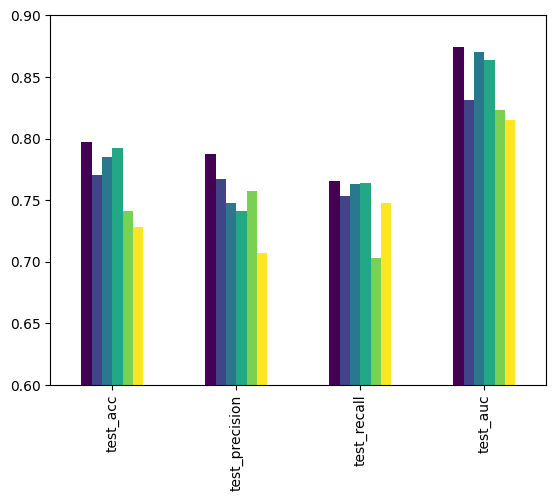

In [13]:
bmi_df.T.plot(kind='bar',cmap='viridis',legend=False,ylim=(0.6,0.9))


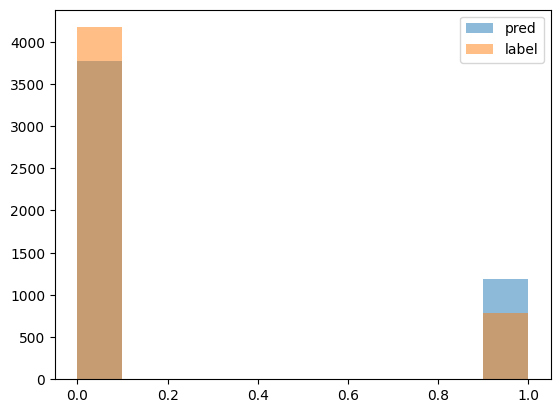

In [21]:
plt.hist(all_bp_pred_aug_nostop_test_preds['pred'],alpha=0.5,label='pred')
plt.hist(all_bp_pred_aug_nostop_test_preds['binaryLabel'],alpha=0.5,label='label')
plt.legend()
plt.show()

<AxesSubplot:xlabel='assessment_centre', ylabel='hypertension prevalence'>

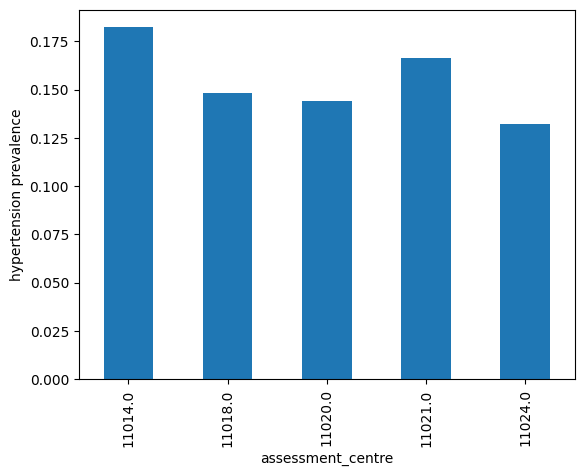

In [13]:
# plot sample size by assessment centre
xf

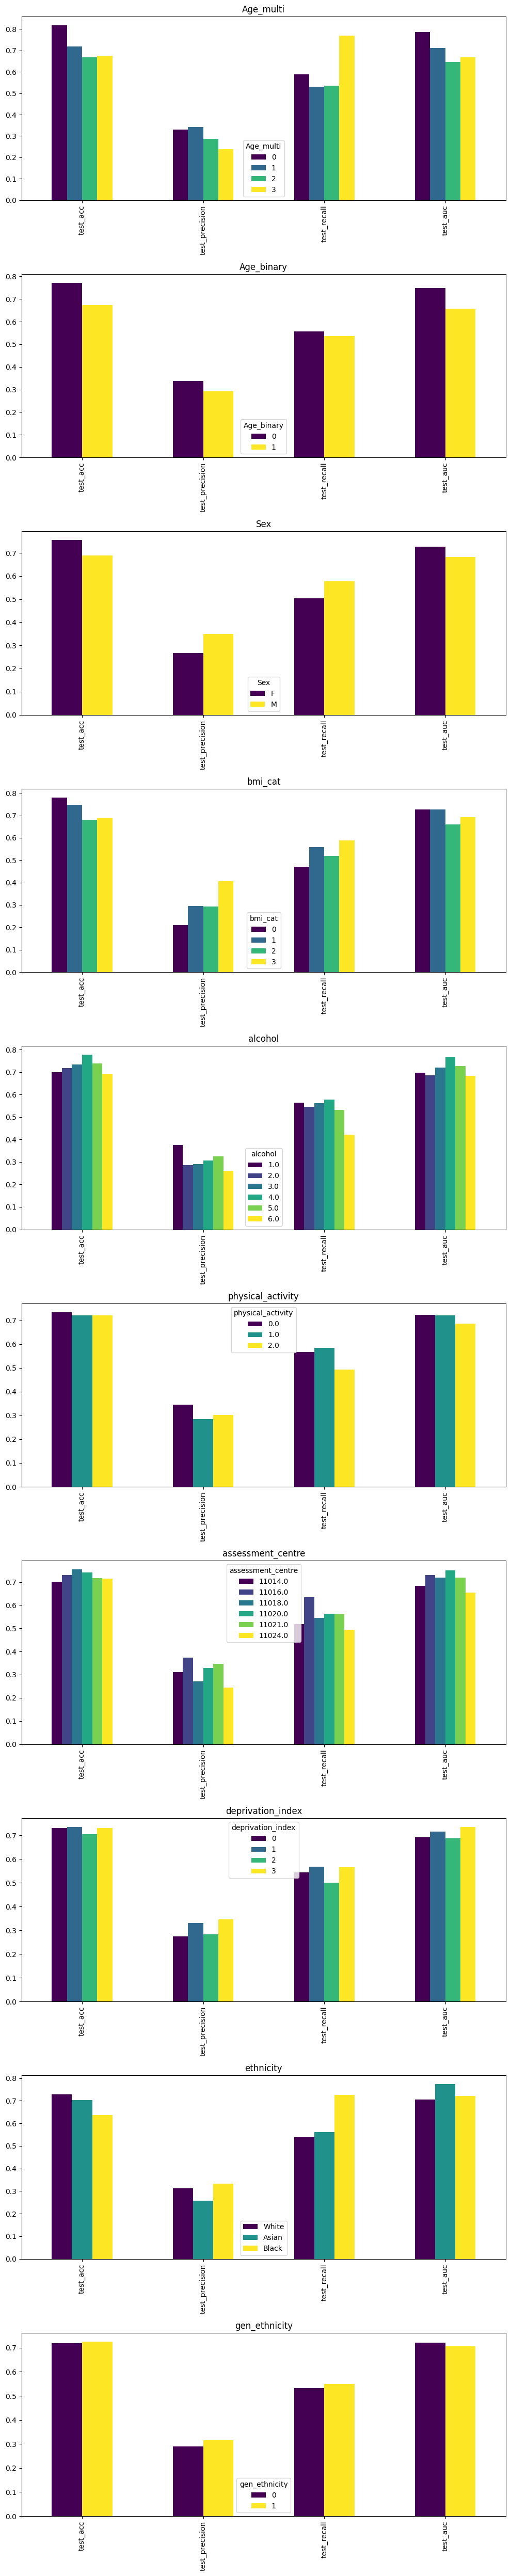

In [40]:
fig, axs = plt.subplots(len(subgroups), figsize=(10, 5*len(subgroups)))

train_preds = bp_pred_aug_nostop_test_preds
for i, col_name in enumerate(subgroups):
    train_acc_list, train_precision_list, train_recall_list, train_f1_list = get_subgroup_stats([train_preds], col_name)
    train_auc_list = get_subgroup_auc([train_preds],col_name)
    
    bmi_df = pd.DataFrame({'test_acc':train_acc_list[-1],'test_precision':train_precision_list[-1],'test_recall':train_recall_list[-1],'test_auc':train_auc_list[-1]})

    bmi_df.T.plot(kind='bar',cmap='viridis', ax=axs[i])
    if col_name == 'ethnicity':
        legend_labels = ['White', 'Asian', 'Black', 'Mixed']
        axs[i].legend(legend_labels)

    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

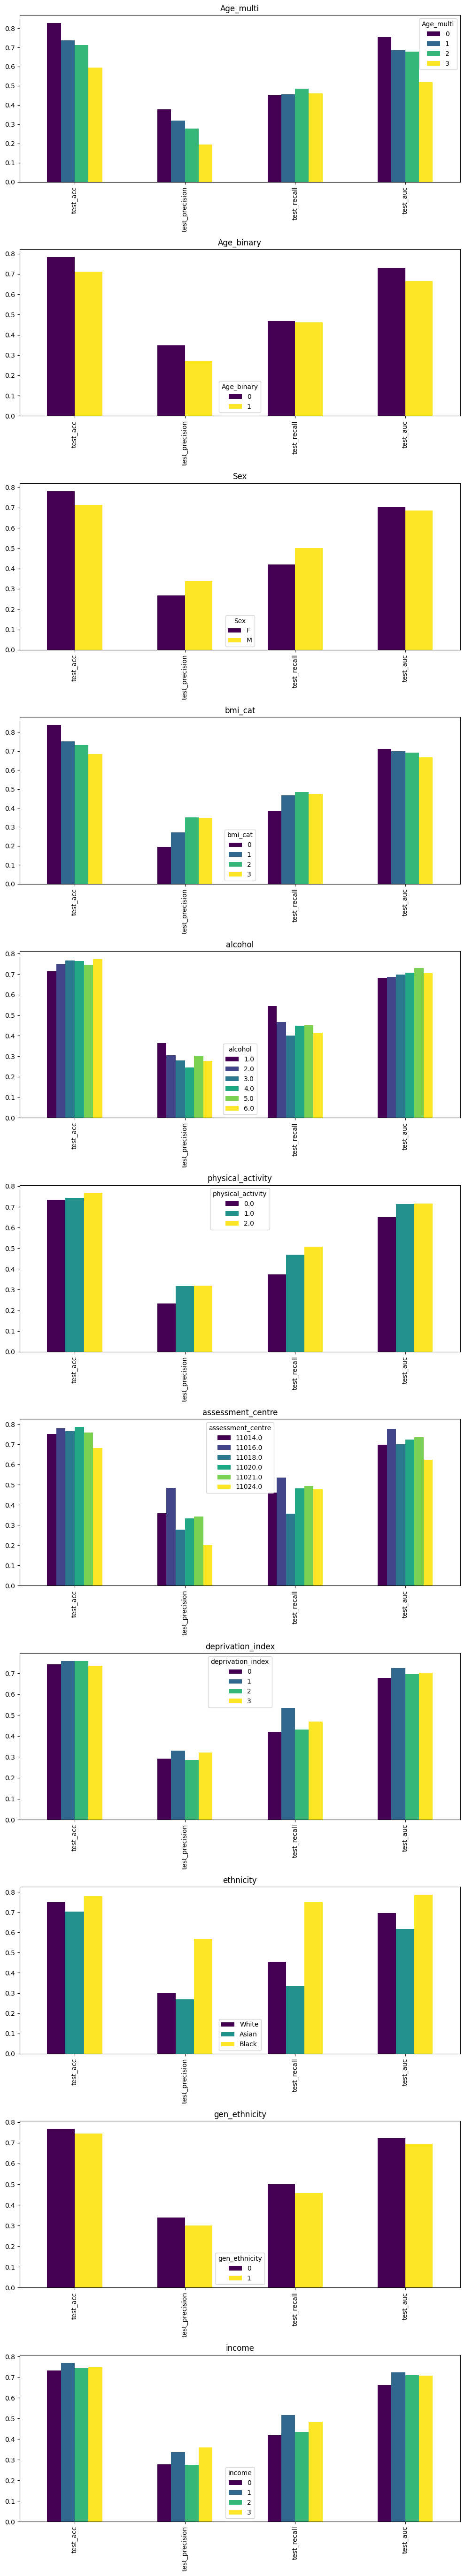

In [22]:
fig, axs = plt.subplots(len(subgroups), figsize=(10, 5*len(subgroups)))

train_preds = all_bp_pred_aug_nostop_test_preds
for i, col_name in enumerate(subgroups):
    train_acc_list, train_precision_list, train_recall_list, train_f1_list = get_subgroup_stats([train_preds], col_name)
    train_auc_list = get_subgroup_auc([train_preds],col_name)
    
    bmi_df = pd.DataFrame({'test_acc':train_acc_list[-1],'test_precision':train_precision_list[-1],'test_recall':train_recall_list[-1],'test_auc':train_auc_list[-1]})

    bmi_df.T.plot(kind='bar',cmap='viridis', ax=axs[i])
    if col_name == 'ethnicity':
        legend_labels = ['White', 'Asian', 'Black', 'Mixed']
        axs[i].legend(legend_labels)

    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

## Analyse results from ethnicity mitigation models

In [51]:
bsl_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Ethnicity/cusResNet18/baseline/bsl_ethni_bp_pred/baseline_7198d5cdad_test_pred_stat.csv')
dind_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Ethnicity/cusResNet18/DomainInd/dind_ethni_bp_pred/DomainInd_df13ceaa9b_test_pred_stat.csv')
dro_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Ethnicity/cusResNet18/GroupDRO/dro_ethni_bp_pred/GroupDRO_6550db4be8_test_pred_stat.csv')
resample_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Ethnicity/cusResNet18/resampling/resample_ethni_bp_pred/resampling_5c5e5f67b0_test_pred_stat.csv')
swad_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Ethnicity/cusResNet18/SWAD/swad_ethni_bp_pred/SWAD_f6f25baf60_test_pred_stat.csv')

mit_results = {'Baseline': bsl_stats_df, 'Domain Ind': dind_stats_df, 'Group DRO': dro_stats_df, 'Resampling': resample_stats_df, 'SWAD': swad_stats_df}
# concatenate row[0] of all 5 dataframes and add an extra col for name of method

mit_results_df = pd.concat([df.iloc[0] for df in mit_results.values()], axis=1).T
mit_results_df = mit_results_df.apply(pd.to_numeric, errors='coerce')


In [52]:
mit_results_df['Method']= ['Baseline','Domain Ind','Group DRO','Resampling','SWAD']
mit_results_df.set_index('Method',inplace=True)
mit_results_df.drop('Unnamed: 0',axis=1,inplace=True) 

In [53]:
mit_results_df

,Test Overall AUC,Test Overall Acc,Test acc-group_0,Test auc-group_0,Test acc-group_1,Test auc-group_1,Test acc-group_2,Test auc-group_2,Test acc-group_3,Test auc-group_3,...,Test Overall FPR,Test Overall FNR,Test FPR-group_0,Test FPR-group_1,Test FPR-group_2,Test FPR-group_3,Test FNR-group_0,Test FNR-group_1,Test FNR-group_2,Test FNR-group_3
Method,,,,,,,,,,,,,,,,,,,,,
Baseline,0.709618,0.702671,0.541401,0.623412,0.706250,0.710567,0.750000,0.789598,0.721429,0.690078,...,0.276279,0.403242,0.5323,0.2704,0.2553,0.2479,0.1818,0.4121,0.2222,0.4348
Domain Ind,0.698122,0.634806,0.554140,0.686217,0.635893,0.698238,0.660714,0.768322,0.671429,0.664437,...,0.373137,0.325228,0.5081,0.3722,0.3404,0.2821,0.2121,0.3232,0.3333,0.5652
Group DRO,0.695226,0.682177,0.643312,0.671065,0.682143,0.696427,0.750000,0.789598,0.700000,0.666667,...,0.301450,0.400203,0.3710,0.3023,0.1915,0.2393,0.3030,0.3970,0.5556,0.6087
Resampling,0.624819,0.613304,0.560510,0.634409,0.613036,0.626145,0.714286,0.643026,0.642857,0.581568,...,0.379581,0.422492,0.4677,0.3803,0.2128,0.3248,0.3333,0.4208,0.6667,0.5217
SWAD,0.711788,0.677810,0.573248,0.719453,0.678393,0.710242,0.785714,0.815603,0.728571,0.707915,...,0.312727,0.369807,0.5000,0.3104,0.1702,0.2650,0.1515,0.3785,0.4444,0.3043


In [54]:
 
group_auc_cols = ['Test auc-group_0','Test auc-group_1','Test auc-group_2','Test auc-group_3']

mit_results_df['AUC Gap'] = mit_results_df[group_auc_cols].max(axis=1) - mit_results_df[group_auc_cols].min(axis=1)
mit_results_df['Min AUC'] = mit_results_df[group_auc_cols].min(axis=1)

In [56]:
mit_results_df = mit_results_df.round(3)
mit_results_df

,Test Overall AUC,Test Overall Acc,Test acc-group_0,Test auc-group_0,Test acc-group_1,Test auc-group_1,Test acc-group_2,Test auc-group_2,Test acc-group_3,Test auc-group_3,...,Test FPR-group_0,Test FPR-group_1,Test FPR-group_2,Test FPR-group_3,Test FNR-group_0,Test FNR-group_1,Test FNR-group_2,Test FNR-group_3,AUC Gap,Min AUC
Method,,,,,,,,,,,,,,,,,,,,,
Baseline,0.710,0.703,0.541,0.623,0.706,0.711,0.750,0.790,0.721,0.690,...,0.532,0.270,0.255,0.248,0.182,0.412,0.222,0.435,0.166,0.623
Domain Ind,0.698,0.635,0.554,0.686,0.636,0.698,0.661,0.768,0.671,0.664,...,0.508,0.372,0.340,0.282,0.212,0.323,0.333,0.565,0.104,0.664
Group DRO,0.695,0.682,0.643,0.671,0.682,0.696,0.750,0.790,0.700,0.667,...,0.371,0.302,0.192,0.239,0.303,0.397,0.556,0.609,0.123,0.667
Resampling,0.625,0.613,0.561,0.634,0.613,0.626,0.714,0.643,0.643,0.582,...,0.468,0.380,0.213,0.325,0.333,0.421,0.667,0.522,0.061,0.582
SWAD,0.712,0.678,0.573,0.719,0.678,0.710,0.786,0.816,0.729,0.708,...,0.500,0.310,0.170,0.265,0.152,0.378,0.444,0.304,0.108,0.708


In [57]:
mit_results_df[['Test Overall AUC','Test Overall Acc','AUC Gap','Min AUC']]

,Test Overall AUC,Test Overall Acc,AUC Gap,Min AUC
Method,,,,
Baseline,0.710,0.703,0.166,0.623
Domain Ind,0.698,0.635,0.104,0.664
Group DRO,0.695,0.682,0.123,0.667
Resampling,0.625,0.613,0.061,0.582
SWAD,0.712,0.678,0.108,0.708


In [58]:
mit_results_df[['Test Overall AUC','Test Overall Acc','AUC Gap','Min AUC']].to_csv('ethnicity_mit_results.csv')

<AxesSubplot:xlabel='method'>

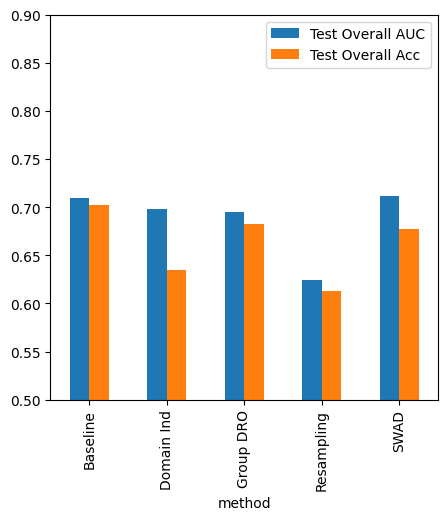

In [18]:
mit_results_df[['Test Overall AUC','Test Overall Acc']].plot(kind='bar',figsize=(5,5),ylim = (0.5,0.9))

Text(0, 0.5, 'Blood pressure prediction AUC')

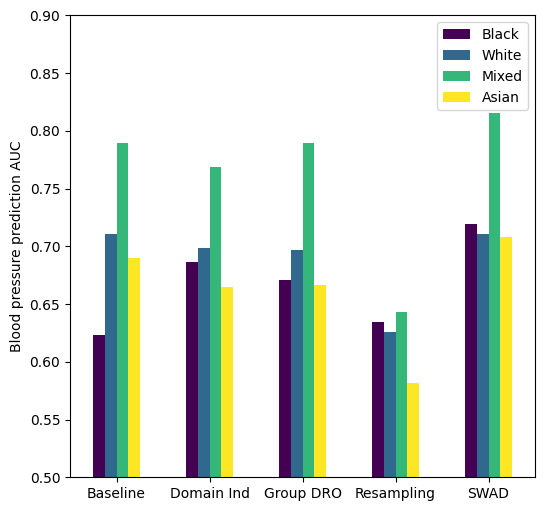

In [33]:
import matplotlib.pyplot as plt

group_auc_cols = ['Test auc-group_0','Test auc-group_1','Test auc-group_2','Test auc-group_3']
legend_labels = ['Black', 'White', 'Mixed', 'Asian']

ax = mit_results_df[group_auc_cols].plot(kind='bar',figsize=(6,6),ylim = (0.5,0.9), colormap='viridis')  # use a colormap
ax.set_xlabel('')  # hide x axis title
ax.legend(legend_labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # make x axis labels horizontal
ax.set_ylabel('Blood pressure prediction AUC')

Text(0, 0.5, 'Test set sample number')

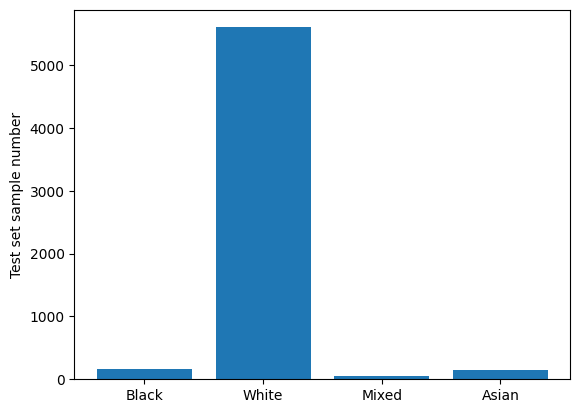

In [65]:
legend_labels = ['Black', 'White', 'Mixed', 'Asian']
values = [157,5600,56,140]

plt.bar(legend_labels, values)
plt.ylabel('Test set sample number')
# color each bar in differnet colour according to viridis
# ax = mit_results_df[group_auc_cols].plot(kind='bar',figsize=(6,6),ylim = (0.5,0.9), colormap='viridis')  # use a colormap
# ax.set_xlabel('')  # hide x axis title
# ax.legend(legend_labels)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # make x axis labels horizontal
# ax.set_ylabel('Blood pressure prediction AUC')

## Compare adjusted BP results with normal BP

In [2]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'

path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-bp-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-bp-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-bp-high-qual-filt2.csv'

mit_models = ['baseline','baseline','baseline','baseline']
mit_models_subfolder = ['baseline_centre_mit','baseline_centre_mit_1','baseline_centre_mit_2','baseline_centre_mit_3']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'test_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_test_splits)
    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred'])},ignore_index=True)

overall_results_df = overall_results_df.set_index('Model')
overall_results_df

auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
overall_results_df['Min Auc'] = min_aucs
overall_results_df['Auc Gap'] = auc_gaps
overall_results_df['Min Acc'] = min_accs
overall_results_df['Acc Gap'] = acc_gaps

overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(4)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

mean_std

/tmp/slurm-55992132/ipykernel_60471/3676093860.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred'])},ignore_index=True)
/tmp/slurm-55992132/ipykernel_60471/3676093860.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(tes

,Accuracy,Precision,Recall,AUC,Min Auc,Auc Gap,Min Acc,Acc Gap
mean,0.717595,0.287528,0.512148,0.688004,0.608347,0.135693,0.678403,0.078511
std,0.049513,0.025454,0.084763,0.006892,0.013861,0.027968,0.053641,0.032173


In [9]:
overall_results_df

,Accuracy,Precision,Recall,AUC,Min Auc,Auc Gap,Min Acc,Acc Gap
Model,,,,,,,,
0.0,0.722794,0.286643,0.507673,0.684525,0.628232,0.111377,0.667005,0.093034
1.0,0.646477,0.252680,0.632992,0.696910,0.603482,0.175193,0.607107,0.116378
2.0,0.743590,0.298680,0.462916,0.689554,0.596122,0.134425,0.719802,0.045680
3.0,0.757521,0.312108,0.445013,0.681026,0.605551,0.121779,0.719697,0.058951


In [18]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-adj-bp-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-adj-bp-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-adj-bp-high-qual-filt2.csv'

mit_models = ['baseline','baseline','baseline']
mit_models_subfolder = ['baseline_adj_0','baseline_adj_1','baseline_adj_2']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'test_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_test_splits)
    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC','Positive Preds'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['FP']==1])+len(test_df[test_df['TP']==1]))/len(test_df)},ignore_index=True)

overall_results_df = overall_results_df.set_index('Model')
overall_results_df

auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
overall_results_df['Min Auc'] = min_aucs
overall_results_df['Auc Gap'] = auc_gaps
overall_results_df['Min Acc'] = min_accs
overall_results_df['Acc Gap'] = acc_gaps

overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
overall_results_df['Positive Preds'] = overall_results_df['Positive Preds'].astype(float)

summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(3)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

mean_std

/tmp/slurm-54665181/ipykernel_131689/683579177.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['FP']==1])+len(test_df[test_df['TP']==1]))/len(test_df)},ignore_index=True)
/tmp/slurm-54665181/ipykernel_131689/683579177.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
mean,0.743119,0.746766,0.979963,0.711871,0.956525,0.660216,0.098300,0.708129,0.098689
std,0.002756,0.005272,0.008376,0.004348,0.014960,0.010037,0.007351,0.002938,0.009223


In [19]:
overall_results_df

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
Model,,,,,,,,,
0.0,0.740157,0.741025,0.989197,0.715474,0.972946,0.671705,0.090953,0.708129,0.094901
1.0,0.743590,0.747881,0.977839,0.713098,0.952958,0.655797,0.098294,0.705191,0.109203
2.0,0.745609,0.751391,0.972853,0.707041,0.943671,0.653146,0.105654,0.711068,0.091963


In [22]:
# on training data:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-adj-bp-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-adj-bp-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-adj-bp-high-qual-filt2.csv'

mit_models = ['baseline','baseline','baseline']
mit_models_subfolder = ['baseline_adj_0','baseline_adj_1','baseline_adj_2']
mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'pretrained_epoch_13_train_pred.csv' in x][0])
    test_preds = pd.read_csv(path_to_test_preds)
    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC','Positive Preds'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]
   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['label']])/len(test_df),'Precision':len(test_df[(test_df['pred']==1) & (test_df['label']==1)])/(len(test_df[test_df['pred']==1])),'Recall':len(test_df[(test_df['pred']==1) & (test_df['label']==1)])/(len(test_df[test_df['label']==1])),'AUC':roc_auc_score(test_df['label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['pred']==1]))/len(test_df)},ignore_index=True)
overall_results_df = overall_results_df.set_index('Model')
overall_results_df


overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
overall_results_df['Positive Preds'] = overall_results_df['Positive Preds'].astype(float)

summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]
mean_std

/tmp/slurm-55998379/ipykernel_170617/151325478.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['label']])/len(test_df),'Precision':len(test_df[(test_df['pred']==1) & (test_df['label']==1)])/(len(test_df[test_df['pred']==1])),'Recall':len(test_df[(test_df['pred']==1) & (test_df['label']==1)])/(len(test_df[test_df['label']==1])),'AUC':roc_auc_score(test_df['label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['pred']==1]))/len(test_df)},ignore_index=True)
/tmp/slurm-55998379/ipykernel_170617/151325478.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['label']])/len(test_df),'Precisi

,Accuracy,Precision,Recall,AUC,Positive Preds
mean,0.756035,0.759542,0.983285,0.696615,0.962851
std,0.001367,0.002168,0.002820,0.000752,0.005491


### Check results with undersamplign

In [12]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'

path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-adj-bp-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-adj-bp-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-adj-bp-high-qual-filt2.csv'

mit_models = ['resampling','resampling','resampling']
mit_models_subfolder = ['baseline_adj_class_resampling','baseline_adj_class_resampling_1','baseline_adj_class_resampling_2']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'pretrained_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_test_splits)
    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC','Positive Preds'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['FP']==1])+len(test_df[test_df['TP']==1]))/len(test_df)},ignore_index=True)

overall_results_df = overall_results_df.set_index('Model')
overall_results_df

auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
overall_results_df['Min Auc'] = min_aucs
overall_results_df['Auc Gap'] = auc_gaps
overall_results_df['Min Acc'] = min_accs
overall_results_df['Acc Gap'] = acc_gaps

overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
overall_results_df['Positive Preds'] = overall_results_df['Positive Preds'].astype(float)

summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(3)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

mean_std

/tmp/slurm-55998379/ipykernel_170617/1059858712.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['FP']==1])+len(test_df[test_df['TP']==1]))/len(test_df)},ignore_index=True)
/tmp/slurm-55998379/ipykernel_170617/1059858712.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pr

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
mean,0.740427,0.741716,0.987904,0.693348,0.970792,0.643262,0.082677,0.702329,0.109540
std,0.002921,0.003411,0.003385,0.013580,0.007707,0.011062,0.010475,0.004755,0.006397


In [16]:
pd.read_csv(path_to_test_preds)

,index,pred,label,raw_pred
0,32950,1.0,0.0,0.643663
1,13355,1.0,0.0,0.447655
2,51872,1.0,1.0,0.613936
3,51441,1.0,1.0,0.504722
4,17692,0.0,0.0,0.262690
...,...,...,...,...
66036,26316,1.0,1.0,0.385177
66037,16139,1.0,0.0,0.454782
66038,48090,0.0,0.0,0.178310
66039,22513,1.0,1.0,0.697735


On training data:

In [21]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'

path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-adj-bp-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-adj-bp-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-adj-bp-high-qual-filt2.csv'

mit_models = ['resampling','resampling','resampling']
mit_models_subfolder = ['baseline_adj_class_resampling','baseline_adj_class_resampling_1','baseline_adj_class_resampling_2']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'pretrained_epoch_13_train_pred.csv' in x][0])
    test_preds = pd.read_csv(path_to_test_preds)
    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC','Positive Preds'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]
   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['label']])/len(test_df),'Precision':len(test_df[(test_df['pred']==1) & (test_df['label']==1)])/(len(test_df[test_df['pred']==1])),'Recall':len(test_df[(test_df['pred']==1) & (test_df['label']==1)])/(len(test_df[test_df['label']==1])),'AUC':roc_auc_score(test_df['label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['pred']==1]))/len(test_df)},ignore_index=True)
overall_results_df = overall_results_df.set_index('Model')
overall_results_df


overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
overall_results_df['Positive Preds'] = overall_results_df['Positive Preds'].astype(float)

summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]
mean_std

/tmp/slurm-55998379/ipykernel_170617/902883853.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['label']])/len(test_df),'Precision':len(test_df[(test_df['pred']==1) & (test_df['label']==1)])/(len(test_df[test_df['pred']==1])),'Recall':len(test_df[(test_df['pred']==1) & (test_df['label']==1)])/(len(test_df[test_df['label']==1])),'AUC':roc_auc_score(test_df['label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['pred']==1]))/len(test_df)},ignore_index=True)
/tmp/slurm-55998379/ipykernel_170617/902883853.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['label']])/len(test_df),'Precisi

,Accuracy,Precision,Recall,AUC,Positive Preds
mean,0.614341,0.572921,0.895639,0.711397,0.780894
std,0.001350,0.002748,0.009016,0.002143,0.009066


In [13]:
overall_results_df

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
Model,,,,,,,,,
0.0,0.738542,0.739996,0.988643,0.690105,0.973753,0.649557,0.070654,0.703804,0.103014
1.0,0.738946,0.739508,0.990859,0.681684,0.976580,0.630489,0.089834,0.697011,0.109807
2.0,0.743792,0.745645,0.984211,0.708257,0.962043,0.649739,0.087544,0.706170,0.115799


In [8]:
# double check it is being done correctly:
train_df = pd.read_csv("/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18/resampling/baseline_adj_class_resampling/pretrained_epoch_0_train_pred.csv")
bsl_train_df = pd.read_csv("/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18/baseline/baseline_adj_0/pretrained_epoch_0_train_pred.csv")
train_df

,index,pred,label,raw_pred
0,4115,1.0,1.0,0.598152
1,8111,1.0,0.0,0.672896
2,3429,1.0,0.0,0.734355
3,34804,1.0,1.0,0.440808
4,31498,1.0,1.0,0.593620
...,...,...,...,...
66036,33318,1.0,0.0,0.519470
66037,13860,1.0,1.0,0.758419
66038,43220,1.0,1.0,0.395480
66039,21932,1.0,1.0,0.553946


In [9]:
print(len(train_df[train_df['label']==0])/len(train_df))
print(len(train_df[train_df['label']==1])/len(train_df))

print(len(bsl_train_df[bsl_train_df['label']==0])/len(bsl_train_df))
print(len(bsl_train_df[bsl_train_df['label']==1])/len(bsl_train_df))

0.5034599718356778
0.4965400281643222
0.2562499053618207
0.7437500946381793


# With different pos weights

In [28]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-adj-bp-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-adj-bp-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-adj-bp-high-qual-filt2.csv'

mit_models = ['baseline','baseline','baseline','baseline']
mit_models_subfolder = ['baseline_posweight_005','baseline_posweight_025','baseline_posweight_033','baseline_posweight_050']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'pretrained_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_test_splits)
    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC','Positive Preds'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['FP']==1])+len(test_df[test_df['TP']==1]))/len(test_df)},ignore_index=True)

overall_results_df['Pos weight'] = [0.05,0.25,0.33,0.5]
overall_results_df = overall_results_df.set_index('Pos weight')

overall_results_df

auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
overall_results_df['Min Auc'] = min_aucs
overall_results_df['Auc Gap'] = auc_gaps
overall_results_df['Min Acc'] = min_accs
overall_results_df['Acc Gap'] = acc_gaps

overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
overall_results_df['Positive Preds'] = overall_results_df['Positive Preds'].astype(float)

summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(4)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

mean_std

/tmp/slurm-54665181/ipykernel_131689/4171869282.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']),'Positive Preds':(len(test_df[test_df['FP']==1])+len(test_df[test_df['TP']==1]))/len(test_df)},ignore_index=True)
/tmp/slurm-54665181/ipykernel_131689/4171869282.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pr

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
mean,0.741268,0.744015,0.983518,0.708149,0.963557,0.651984,0.089481,0.705436,0.105170
std,0.002706,0.005354,0.009043,0.001870,0.015744,0.017666,0.012990,0.005081,0.009819


In [29]:
overall_results_df

,Model,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
Pos weight,,,,,,,,,,
0.05,0.0,0.743994,0.750642,0.971468,0.710759,0.943267,0.671148,0.075910,0.709109,0.116649
0.25,1.0,0.741571,0.743520,0.985319,0.706766,0.965879,0.641915,0.096916,0.703232,0.103586
0.33,2.0,0.737533,0.737557,0.993352,0.708249,0.981627,0.632838,0.103684,0.699314,0.107504
0.50,3.0,0.741975,0.744342,0.983934,0.706822,0.963456,0.662034,0.081415,0.710088,0.092942


In [24]:
subgroups = ['Age_multi','Age_binary','Sex','bmi_cat','alcohol','physical_activity','assessment_centre','deprivation_index','ethnicity','gen_ethnicity']
make_test_results_df([mit_results_dict[2][0]],subgroups)

,Subgroup,Test Acc,Test Acc Gap,Test Precision,Test Precision Gap,Test Recall,Test Recall Gap,Test AUC,Test AUC Gap
0,Age_multi,0.741975,0.246732,0.744342,0.256327,0.983934,0.032298,0.706822,0.183708
1,Age_binary,0.741975,0.142013,0.744342,0.149632,0.983934,0.015878,0.706822,0.022434
2,Sex,0.741975,0.106705,0.744342,0.110569,0.983934,0.015817,0.706822,0.019371
3,bmi_cat,0.741975,0.283254,0.744342,0.304195,0.983934,0.018968,0.706822,0.058059
4,alcohol,0.741975,0.088339,0.744342,0.092544,0.983934,0.005625,0.706822,0.101266
5,physical_activity,0.741975,0.020833,0.744342,0.023110,0.983934,0.008171,0.706822,0.031732
6,assessment_centre,0.741975,0.092942,0.744342,0.094107,0.983934,0.028289,0.706822,0.081415
7,deprivation_index,0.741975,0.016420,0.744342,0.015609,0.983934,0.006802,0.706822,0.022072
8,ethnicity,0.741975,0.032420,0.744342,0.026652,0.983934,0.003249,0.706822,0.094500
9,gen_ethnicity,0.741975,0.031019,0.744342,0.034868,0.983934,0.002754,0.706822,0.005125


In [11]:
train_df = pd.read_csv(path_to_train_splits)

In [12]:
train_df['Age_multi'].value_counts()

2    28374
1    21301
0    14657
3     1709
Name: Age_multi, dtype: int64

<AxesSubplot:>

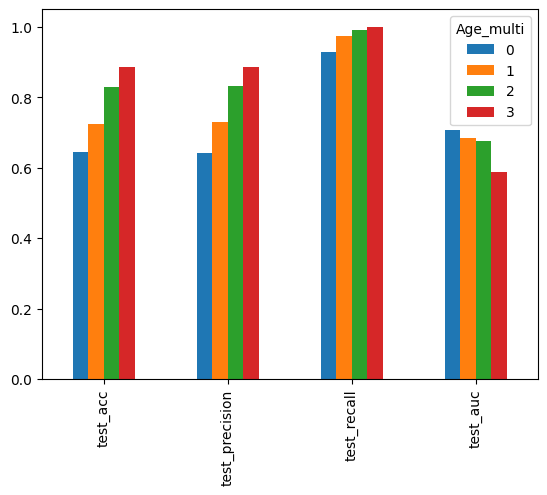

In [16]:
train_acc_list, train_precision_list, train_recall_list, train_f1_list = get_subgroup_stats([mit_results_dict[2][0]], 'Age_multi')
train_auc_list = get_subgroup_auc([mit_results_dict[0][0]],'Age_multi')
    
bmi_df = pd.DataFrame({'test_acc':train_acc_list[-1],'test_precision':train_precision_list[-1],'test_recall':train_recall_list[-1],'test_auc':train_auc_list[-1]})
bmi_df.T.plot(kind='bar')

Compare with how model performs on training data:

In [21]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-adj-bp-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-adj-bp-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-adj-bp-high-qual-filt2.csv'

mit_models = ['baseline','baseline','baseline']
mit_models_subfolder = ['baseline_adj_0','baseline_adj_1','baseline_adj_2']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'train_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_train_splits)
    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred'])},ignore_index=True)

overall_results_df = overall_results_df.set_index('Model')
overall_results_df

auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
overall_results_df['Min Auc'] = min_aucs
overall_results_df['Auc Gap'] = auc_gaps
overall_results_df['Min Acc'] = min_accs
overall_results_df['Acc Gap'] = acc_gaps

overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(3)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

mean_std

/tmp/slurm-53890849/ipykernel_206581/1441428738.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred'])},ignore_index=True)
/tmp/slurm-53890849/ipykernel_206581/1441428738.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(t

,Accuracy,Precision,Recall,AUC,Min Auc,Auc Gap,Min Acc,Acc Gap
mean,0.763985,0.770829,0.971579,0.715765,0.667071,0.073619,0.72939,0.073446
std,0.001438,0.004086,0.006854,0.004003,0.004783,0.002672,0.00286,0.004548


In [23]:
good_quality_images_paths = []
for i in range(1,10):
    path = f'/well/papiez/shared/UKBB/AutoMorph_segmentation/AutoMorph_21015_{i}/Results/M1/Good_quality'
    path_2 = f'/well/papiez/shared/UKBB/AutoMorph_segmentation/AutoMorph_21015_{i}/Results/M1/New_added_images'
    good_quality_images_paths.extend([os.path.join(path,x) for x in os.listdir(path)])
    good_quality_images_paths.extend([os.path.join(path_2,x) for x in os.listdir(path_2)])
good_quality_images = [x.split('/')[-1] for x in good_quality_images_paths]

In [26]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-adj-bp-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-adj-bp-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-adj-bp-high-qual-filt2.csv'

mit_models = ['baseline','baseline','baseline']
mit_models_subfolder = ['baseline_adj_0','baseline_adj_1','baseline_adj_2']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'train_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_train_splits)

    test_preds = test_preds[test_preds['image.id'].isin(good_quality_images)]    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred'])},ignore_index=True)

overall_results_df = overall_results_df.set_index('Model')
overall_results_df

auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
overall_results_df['Min Auc'] = min_aucs
overall_results_df['Auc Gap'] = auc_gaps
overall_results_df['Min Acc'] = min_accs
overall_results_df['Acc Gap'] = acc_gaps

overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(3)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

mean_std

/tmp/slurm-53890849/ipykernel_206581/1851368652.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred'])},ignore_index=True)
/tmp/slurm-53890849/ipykernel_206581/1851368652.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(t

,Accuracy,Precision,Recall,AUC,Min Auc,Auc Gap,Min Acc,Acc Gap
mean,0.754721,0.763297,0.959192,0.736337,0.687128,0.072358,0.723430,0.073542
std,0.001999,0.005372,0.008913,0.004056,0.004689,0.002727,0.002759,0.005583


In [22]:
test_preds

,Unnamed: 0.1,Unnamed: 0,index,image.id,eid,image.instance,image.array,age_at_imaging,Sex,bmi_at_imaging,...,pred,raw_pred,FP,FN,TP,TN,bmi_cat,deprivation_index,ethnicity,gen_ethnicity
0,0,0,0,1000058_21015_1_0.png,1000058,1,0,63.824176,F,36.8,...,1.0,0.821455,0,0,1,0,3,1,1,0
1,1,1,1,1000083_21015_0_0.png,1000083,0,0,42.000000,M,26.9,...,1.0,0.965021,0,0,1,0,2,1,1,1
2,2,2,2,1000150_21015_0_0.png,1000150,0,0,44.000000,F,19.6,...,1.0,0.614512,1,0,0,0,0,3,1,0
3,3,3,3,1000195_21015_0_0.png,1000195,0,0,59.000000,F,28.6,...,1.0,0.770416,0,0,1,0,2,1,1,1
4,4,4,4,1000234_21015_0_0.png,1000234,0,0,51.000000,F,38.4,...,1.0,0.865187,0,0,1,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66036,66036,66036,66157,6023703_21015_0_0.png,6023703,0,0,67.000000,M,26.9,...,1.0,0.721452,1,0,0,0,2,1,1,1
66037,66037,66037,66158,6023725_21015_0_0.png,6023725,0,0,70.000000,M,23.8,...,1.0,0.802060,0,0,1,0,0,3,1,1
66038,66038,66038,66159,6024014_21015_0_0.png,6024014,0,0,43.000000,M,28.1,...,1.0,0.617523,0,0,1,0,2,0,1,0
66039,66039,66039,66160,6024070_21015_0_0.png,6024070,0,0,49.000000,M,28.3,...,1.0,0.864194,1,0,0,0,2,3,4,0


## Diabetes results

In [10]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-diab-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-diab-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-diab-high-qual-filt2.csv'

mit_models = ['baseline','baseline','baseline']
mit_models_subfolder = ['baseline_diab_0','baseline_diab_1','baseline_diab_2']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'test_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_test_splits)
    
    mit_results_dict[i]=[test_preds]

overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC', 'Positive Preds'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']), 'Positive Preds':len(test_df[test_df['pred']==1])/len(test_df)},ignore_index=True)

overall_results_df = overall_results_df.set_index('Model')
overall_results_df

auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
overall_results_df['Min Auc'] = min_aucs
overall_results_df['Auc Gap'] = auc_gaps
overall_results_df['Min Acc'] = min_accs
overall_results_df['Acc Gap'] = acc_gaps

overall_results_df['Accuracy'] = overall_results_df['Accuracy'].astype(float)
overall_results_df['Precision'] = overall_results_df['Precision'].astype(float)
overall_results_df['Recall'] = overall_results_df['Recall'].astype(float)
overall_results_df['AUC'] = overall_results_df['AUC'].astype(float)
summary_stats = overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(3)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

mean_std

/tmp/slurm-53890849/ipykernel_206581/174596327.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']), 'Positive Preds':len(test_df[test_df['pred']==1])/len(test_df)},ignore_index=True)
/tmp/slurm-53890849/ipykernel_206581/174596327.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_results_df = overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/

,Accuracy,Precision,Recall,AUC,Min Auc,Auc Gap,Min Acc,Acc Gap
mean,0.731543,0.089752,0.41247,0.615242,0.585369,0.108428,0.648731,0.142283
std,0.052816,0.005284,0.09560,0.014296,0.011320,0.045606,0.090714,0.077155


In [11]:
overall_results_df

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
Model,,,,,,,,,
0.0,0.788411,0.089552,0.302158,0.600490,0.18938,0.572299,0.160693,0.721827,0.115294
1.0,0.684030,0.084571,0.471223,0.616203,0.31274,0.592037,0.087881,0.547208,0.229307
2.0,0.722189,0.095133,0.464029,0.629033,0.273773,0.591771,0.076710,0.677157,0.082249


In [12]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-diab-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-diab-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-diab-high-qual-filt2.csv'

mit_models = ['baseline','baseline','baseline','baseline']
mit_models_subfolder = ['baseline_diab_pweight_2','baseline_diab_pweight_5','baseline_diab_pweight_10','baseline_diab_pweight_20']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'test_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_test_splits)
    
    mit_results_dict[i]=[test_preds]

posweight_overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC', 'Positive Preds'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   posweight_overall_results_df = posweight_overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']), 'Positive Preds':len(test_df[test_df['pred']==1])/len(test_df)},ignore_index=True)

posweight_overall_results_df = posweight_overall_results_df.set_index('Model')
posweight_overall_results_df

auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
posweight_overall_results_df['Min Auc'] = min_aucs
posweight_overall_results_df['Auc Gap'] = auc_gaps
posweight_overall_results_df['Min Acc'] = min_accs
posweight_overall_results_df['Acc Gap'] = acc_gaps

posweight_overall_results_df['Accuracy'] = posweight_overall_results_df['Accuracy'].astype(float)
posweight_overall_results_df['Precision'] = posweight_overall_results_df['Precision'].astype(float)
posweight_overall_results_df['Recall'] = posweight_overall_results_df['Recall'].astype(float)
posweight_overall_results_df['AUC'] = posweight_overall_results_df['AUC'].astype(float)
summary_stats = posweight_overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(4)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

posweight_overall_results_df

/tmp/slurm-53890849/ipykernel_206581/4042158742.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posweight_overall_results_df = posweight_overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']), 'Positive Preds':len(test_df[test_df['pred']==1])/len(test_df)},ignore_index=True)
/tmp/slurm-53890849/ipykernel_206581/4042158742.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posweight_overall_results_df = posweight_overall_results_df.append({'Model':i,'Accuracy':len(test_df[t

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
Model,,,,,,,,,
0.0,0.760953,0.088929,0.352518,0.598578,0.222491,0.574458,0.130869,0.668020,0.153949
1.0,0.816879,0.096277,0.269784,0.607734,0.157278,0.562239,0.094078,0.794837,0.065012
2.0,0.832223,0.097525,0.241007,0.606715,0.138704,0.580065,0.096985,0.796158,0.071169
3.0,0.856451,0.112701,0.226619,0.624982,0.112861,0.592740,0.072014,0.833333,0.057756


In [13]:
all_results_df = pd.concat([overall_results_df,posweight_overall_results_df])
all_results_df['Positive weight'] = [1,1,1,2,5,10,20]
all_results_df.set_index('Positive weight')


,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
Positive weight,,,,,,,,,
1,0.788411,0.089552,0.302158,0.600490,0.18938,0.572299,0.160693,0.721827,0.115294
1,0.684030,0.084571,0.471223,0.616203,0.31274,0.592037,0.087881,0.547208,0.229307
1,0.722189,0.095133,0.464029,0.629033,0.273773,0.591771,0.076710,0.677157,0.082249
2,0.760953,0.088929,0.352518,0.598578,0.222491,0.574458,0.130869,0.668020,0.153949
5,0.816879,0.096277,0.269784,0.607734,0.157278,0.562239,0.094078,0.794837,0.065012
10,0.832223,0.097525,0.241007,0.606715,0.138704,0.580065,0.096985,0.796158,0.071169
20,0.856451,0.112701,0.226619,0.624982,0.112861,0.592740,0.072014,0.833333,0.057756


In [14]:
ROOT = '/gpfs3/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/'
RESULTS_DIR = ROOT + 'your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18'
path_to_train_splits = ROOT + 'data/ukbb-ret/splits/train-diab-all-filt2.csv'
path_to_val_splits = ROOT + 'data/ukbb-ret/splits/val-diab-all-filt2.csv'
path_to_test_splits = ROOT + 'data/ukbb-ret/splits/test-diab-high-qual-filt2.csv'

mit_models = ['resampling','resampling','resampling']
mit_models_subfolder = ['resample_class_diab','resample_class_diab_1','resample_class_diab_2']

mit_results_dict = {}
for i,model in enumerate(mit_models):
    folder = mit_models_subfolder[i]
    results_folder = os.path.join(RESULTS_DIR,model,folder)
    #train_preds,val_preds = get_val_train_preds(results_folder,path_to_train_splits,path_to_val_splits,preprocessing_function=preprocess_ukbb_data)
    path_to_test_preds = os.path.join(results_folder, [x for x in os.listdir(results_folder) if 'test_pred.csv' in x][0])
    test_preds = preprocess_ukbb_data(path_to_test_preds,path_to_test_splits)
    
    mit_results_dict[i]=[test_preds]

resample_overall_results_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','AUC', 'Positive Preds'])
for i in range(len(mit_models)):
   test_df = mit_results_dict[i][0]

   resample_overall_results_df = resample_overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']), 'Positive Preds':len(test_df[test_df['pred']==1])/len(test_df)},ignore_index=True)

resample_overall_results_df = resample_overall_results_df.set_index('Model')


auc_gaps = []
min_aucs = []
acc_gaps = []
min_accs = []
for i in range(len(mit_models)):
    test_preds = mit_results_dict[i][0]
    test_acc_list, test_precision_list, test_recall_list, test_f1_list = get_subgroup_stats([test_preds], 'assessment_centre')
    test_auc_list = get_subgroup_auc([test_preds],'assessment_centre')
    test_pp_list = get_subgroup_positive_preds([test_preds],'assessment_centre')

    test_df = pd.DataFrame({'test_acc':test_acc_list[-1],'test_precision':test_precision_list[-1],'test_recall':test_recall_list[-1],'test_auc':test_auc_list[-1],'test_positive_preds':test_pp_list[-1]})

    mit_results_dict[i].append(test_df)

    auc_gaps.append(test_df['test_auc'].max()-test_df['test_auc'].min())
    min_aucs.append(test_df['test_auc'].min())

    acc_gaps.append(test_df['test_acc'].max()-test_df['test_acc'].min())
    min_accs.append(test_df['test_acc'].min())
    
resample_overall_results_df['Min Auc'] = min_aucs
resample_overall_results_df['Auc Gap'] = auc_gaps
resample_overall_results_df['Min Acc'] = min_accs
resample_overall_results_df['Acc Gap'] = acc_gaps

resample_overall_results_df['Accuracy'] = resample_overall_results_df['Accuracy'].astype(float)
resample_overall_results_df['Precision'] = resample_overall_results_df['Precision'].astype(float)
resample_overall_results_df['Recall'] = resample_overall_results_df['Recall'].astype(float)
resample_overall_results_df['AUC'] = resample_overall_results_df['AUC'].astype(float)
summary_stats = resample_overall_results_df.describe()
mean_std = summary_stats.loc[['mean', 'std']]

# get mean and std per assessment centre
all_dfs = pd.concat([mit_results_dict[i][1] for i in range(3)])
mean_df = all_dfs.groupby('assessment_centre').mean()
std_df = all_dfs.groupby('assessment_centre').std()
result_df = pd.concat([mean_df, std_df], axis=1, keys=['Mean', 'Std'])

resample_overall_results_df

/tmp/slurm-53890849/ipykernel_206581/1344735509.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resample_overall_results_df = resample_overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_df['pred']==test_df['binary_label']])/len(test_df),'Precision':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FP']==1])),'Recall':len(test_df[test_df['TP']==1])/(len(test_df[test_df['TP']==1])+len(test_df[test_df['FN']==1])),'AUC':roc_auc_score(test_df['binary_label'], test_df['raw_pred']), 'Positive Preds':len(test_df[test_df['pred']==1])/len(test_df)},ignore_index=True)
/tmp/slurm-53890849/ipykernel_206581/1344735509.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resample_overall_results_df = resample_overall_results_df.append({'Model':i,'Accuracy':len(test_df[test_

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap
Model,,,,,,,,,
0.0,0.801938,0.087925,0.269784,0.568716,0.172219,0.492418,0.122986,0.761364,0.084322
1.0,0.769231,0.086124,0.323741,0.588172,0.210983,0.518243,0.119544,0.621320,0.213156
2.0,0.801938,0.087925,0.269784,0.568716,0.172219,0.492418,0.122986,0.761364,0.084322


In [15]:
resample_overall_results_df['resampling'] = [1,1,1]
resample_overall_results_df['Positive weight'] = [1,1,1]
all_results_df['resampling'] = [0,0,0,0,0,0,0]
all_results_df = pd.concat([all_results_df,resample_overall_results_df])
all_results_df.set_index('Positive weight')
all_results_df

,Accuracy,Precision,Recall,AUC,Positive Preds,Min Auc,Auc Gap,Min Acc,Acc Gap,Positive weight,resampling
Model,,,,,,,,,,,
0.0,0.788411,0.089552,0.302158,0.600490,0.18938,0.572299,0.160693,0.721827,0.115294,1,0
1.0,0.684030,0.084571,0.471223,0.616203,0.31274,0.592037,0.087881,0.547208,0.229307,1,0
2.0,0.722189,0.095133,0.464029,0.629033,0.273773,0.591771,0.076710,0.677157,0.082249,1,0
0.0,0.760953,0.088929,0.352518,0.598578,0.222491,0.574458,0.130869,0.668020,0.153949,2,0
1.0,0.816879,0.096277,0.269784,0.607734,0.157278,0.562239,0.094078,0.794837,0.065012,5,0
2.0,0.832223,0.097525,0.241007,0.606715,0.138704,0.580065,0.096985,0.796158,0.071169,10,0
3.0,0.856451,0.112701,0.226619,0.624982,0.112861,0.592740,0.072014,0.833333,0.057756,20,0
0.0,0.801938,0.087925,0.269784,0.568716,0.172219,0.492418,0.122986,0.761364,0.084322,1,1
1.0,0.769231,0.086124,0.323741,0.588172,0.210983,0.518243,0.119544,0.621320,0.213156,1,1


## Analyse results from centre mitigation models

In [3]:
bsl_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18/baseline/baseline_centre_mit/baseline_e1cd986615_cross_testing_pred_stat.csv')
dind_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18/DomainInd/dind_centre_mit/DomainInd_a8f011504c_test_pred_stat.csv')
dro_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18/GroupDRO/gdro_centre_mit/GroupDRO_5842357966_test_pred_stat.csv')
resample_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18/resampling/resampling_centre_mit/resampling_6f75e7c08f_test_pred_stat.csv')
resample_swad_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18/resamplingSWAD/resampling_swad_centre_mit/resamplingSWAD_42d01a18d2_test_pred_stat.csv')
odr_stats_df = pd.read_csv('/well/papiez/users/hri611/python/MEDFAIR-PROJECT/MEDFAIR/your_path/fariness_data/model_records/UKBB_RET/Centre/cusResNet18/ODR/odr_centre_mit/ODR_84f97ff23e_test_pred_stat.csv')


mit_results = {'Baseline': bsl_stats_df, 'Domain Ind': dind_stats_df, 'Group DRO': dro_stats_df, 'Resampling': resample_stats_df, 'Resampling SWAD': resample_swad_stats_df, 'ODR': odr_stats_df}
# concatenate row[0] of all 5 dataframes and add an extra col for name of method

mit_results_df = pd.concat([df.iloc[0] for df in mit_results.values()], axis=1).T
mit_results_df = mit_results_df.apply(pd.to_numeric, errors='coerce')


In [12]:
mit_results_df['Method']= ['Baseline','Domain Ind','Group DRO','Resampling','Resampling SWAD', 'ODR']
mit_results_df.set_index('Method',inplace=True)
#mit_results_df.drop('Unnamed: 0',axis=1,inplace=True) 
group_auc_cols = ['Test auc-group_0','Test auc-group_1','Test auc-group_2','Test auc-group_3', 'Test auc-group_4', 'Test auc-group_5']

mit_results_df['AUC Gap'] = mit_results_df[group_auc_cols].max(axis=1) - mit_results_df[group_auc_cols].min(axis=1)
mit_results_df['Min AUC'] = mit_results_df[group_auc_cols].min(axis=1)

In [6]:
mit_results_df

,Test Overall AUC,Test Overall Acc,Test acc-group_0,Test auc-group_0,Test acc-group_1,Test auc-group_1,Test acc-group_2,Test auc-group_2,Test acc-group_3,Test auc-group_3,...,Test FPR-group_4,Test FPR-group_5,Test FNR-group_0,Test FNR-group_1,Test FNR-group_2,Test FNR-group_3,Test FNR-group_4,Test FNR-group_5,AUC Gap,Min AUC
Method,,,,,,,,,,,,,,,,,,,,,
Baseline,0.684525,0.722794,0.726788,0.739609,0.715842,0.665577,0.748641,0.665920,0.760039,0.714761,...,0.3088,0.2356,0.3846,0.5272,0.6055,0.5102,0.4923,0.4107,0.074032,0.665577
Domain Ind,0.672611,0.682011,0.735326,0.719410,0.728713,0.679190,0.724185,0.667267,0.750245,0.721758,...,0.5696,0.2548,0.5128,0.4946,0.5413,0.4558,0.2538,0.3929,0.054491,0.667267
Group DRO,0.665770,0.697961,0.718250,0.717965,0.735644,0.675071,0.740489,0.643431,0.731636,0.698454,...,0.4386,0.2452,0.4744,0.5000,0.6239,0.4966,0.3846,0.4286,0.074534,0.643431
Resampling,0.683515,0.674541,0.717182,0.719377,0.665347,0.683210,0.717391,0.687371,0.715965,0.700143,...,0.4526,0.2885,0.3974,0.4348,0.5596,0.4694,0.3231,0.3929,0.036167,0.683210
Resampling SWAD,0.698280,0.731476,0.751334,0.745453,0.743564,0.693698,0.741848,0.693502,0.769833,0.717508,...,0.3462,0.1683,0.4423,0.5272,0.5872,0.4898,0.4385,0.4464,0.051951,0.693502
ODR,0.688348,0.691904,0.691569,0.709134,0.691089,0.706864,0.694293,0.680026,0.704212,0.696174,...,0.2901,0.2885,0.3590,0.3533,0.4771,0.4830,0.5385,0.3571,0.029108,0.680026


Text(0, 0.5, 'Blood pressure prediction AUC')

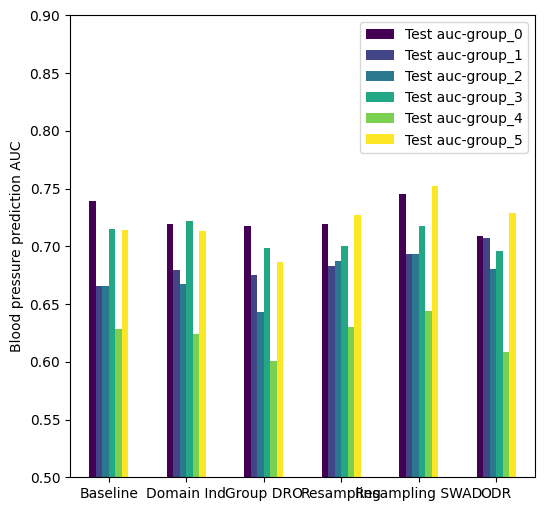

In [7]:
import matplotlib.pyplot as plt

group_auc_cols = ['Test auc-group_0','Test auc-group_1','Test auc-group_2','Test auc-group_3','Test auc-group_4','Test auc-group_5']
#legend_labels = ['Black', 'White', 'Mixed', 'Asian']

ax = mit_results_df[group_auc_cols].plot(kind='bar',figsize=(6,6),ylim = (0.5,0.9), colormap='viridis')  # use a colormap
ax.set_xlabel('')  # hide x axis title
#ax.legend(legend_labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # make x axis labels horizontal
ax.set_ylabel('Blood pressure prediction AUC')

<AxesSubplot:xlabel='Method'>

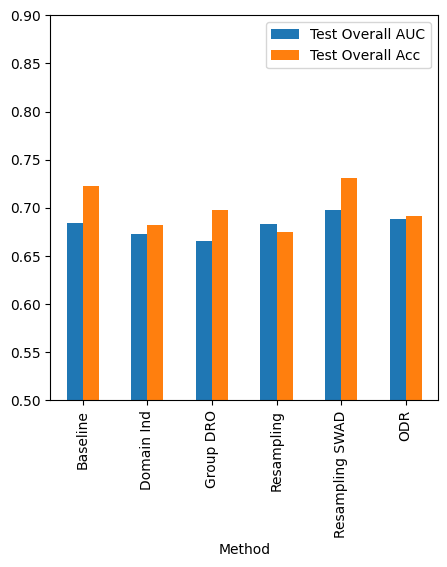

In [8]:
mit_results_df[['Test Overall AUC','Test Overall Acc']].plot(kind='bar',figsize=(5,5),ylim = (0.5,0.9))

<AxesSubplot:xlabel='Method'>

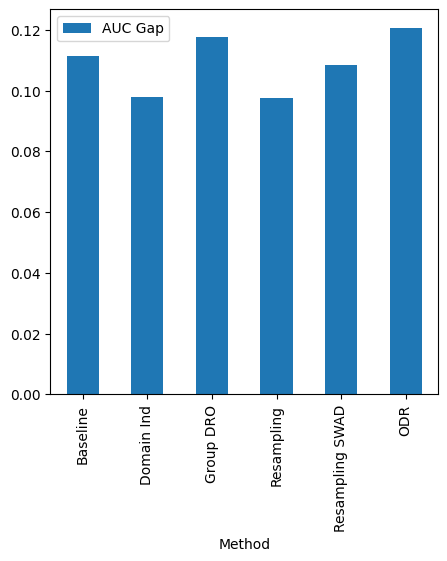

In [13]:
mit_results_df[['AUC Gap']].plot(kind='bar',figsize=(5,5))